# Überschrift Finden!!!
Autor: Emirhan Igci
Datum: 23.04.2025

# Vorwort
Für die verwendete ck

# Agenda <a class="anchor" id="Agenda"></a>
  1. [Einleitung und Zielsetzung](#EinleitungundZielsetzung)
  1.1 [Einleitung und Zielsetzung](#EinleitungundZielsetzung)


# Einleitung und Zielsetzung <a class="anchor" id="EinleitungundZielsetzung"></a>

In der nachfolgenden Analyse werden **Immobilienpreise** von Häusern auf Grundlage verschiedenster Einflussfaktoren analysiert.

Dabei werden folgende Hauptthesen untersucht:

Themen der Untersuchung:
1. Auswirkung der Barrierefreiheit auf den Verkaufspreis
2. Auswirkung der Region auf den Verkaufspreis
3. Auswirkung der Leitzinsen auf den Verkaufspreis

Ziele:
1. Erstellen eines Modells, einer Funktion zur Kaufentscheidung der Immobilie basierend auf Kredit, Eigenkapital und weiteren Faktoren

Innerhalb der Bearbeitung werden weitere Thesen untersucht werden, welche während der Explorativen Datenanalyse erstellt werden.


In [1]:
import sys
from sys import displayhook
# sys.executable adressiert die Python-Installation von Jupyter
! {sys.executable} -m pip install dmba seaborn numpy pandas pgeocode folium

  Using cached dmba-0.2.4-py3-none-any.whl.metadata (1.9 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pgeocode-0.5.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached dmba-0.2.4-py3-none-any.whl (11.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pgeocode-0.5.0-py3-none-any.whl (9.8 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 16.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 M

# Explorative Datenanalyse

## Quelle
Die Quelle der Immobilien wurde durch die FDZ Ruhr bereitgestellt und durch das RWI - Leibnitz-Institut für Wirtschaft nochmals angepasst.
Es gibt zwei Dateitypen:

Die **Panel-Campus-Datei** umfasst Inserate aus den 15 größten deutschen Städten (alle mit mindestens rund 500 000 Einwohnern, darunter Berlin, Hamburg, München bis Duisburg). Für jede Stadt wird pro Kalenderjahr eine ähnlich große Zufallsstichprobe gezogen: Bei Haus-Verkäufen sind es etwa 1 000 Anzeigen pro Jahr, bei Mietwohnungen in Berlin oder Leipzig können es bis zu 50 000 sein. Insgesamt entfallen ungefähr 27 % der Datensätze auf Wohnungs-Verkäufe und 37 % auf Haus-Verkäufe und Mietwohnungen. Berücksichtigt werden nur Inserate, die bestimmte Qualitätskriterien erfüllen (kaum Fehlwerte, keine Ausreißer).

Die **Cross-Sectional-Campus-Datei** enthält eine bundesweite Stichprobe aus dem Jahr 2023. Grundlage sind alle Inserate, die in diesem Jahr mindestens einen Tag online waren; berücksichtigt wird jeweils nur der letzte Spell einer Anzeige. Für Gemeinden mit weniger als 50 Inseraten wird lediglich die Kreisebene ausgewiesen, wobei höchstens 100 Anzeigen pro Kreis gezogen werden. Anschließend wird abhängig von der Gesamtzahl der verfügbaren Datensätze eine Stichprobe von 50, 200, 1 000 oder 5 000 Beobachtungen gebildet.

Insgesamt gibt es daher 6 Dateien (Dateityp x Asschreibungstyp) (2x3):
* Panel: Datendatei für Hausverkäufe (HK_cities)
* Panel: Datendatei für Wohnungsverkäufe (WK_cities)
* Panel: Datendatei für Mietangebote (WM_cities)
* Cross-Sectional: Datendatei für Hausverkäufe (HK_2023)
* Cross-Sectional: Datendatei für Wohnungsverkäufe (WK_2023)
* Cross-Sectional: Datendatei für Mietangebote (WM_2023)

## Beschreibung der Variablen
Die Beschreibung der Variablen orientiert sich an einer bereits vorhandenen Dokumentation der Quelle, in welcher die gesamten Variablen auf Englisch beschrieben wurden. Daher werden die Beschreibungen mithilfe von KI übersetzt und verwendet. Die Richtigkeit der Übersetzung wird manuell überprüft.


| #  | Attribut                        | Beschreibung                         | Datentyp   | Skalierung/Einheit | Typ (DS) |
| -- | ------------------------------- | ------------------------------------ | ---------- | ------------------ | -------- |
| 1  | **obid**                        | Eindeutige künstliche Objekt-ID      | numerisch  | –                  | HS/AS/AR |
| 2  | **adat**                        | Startmonat der Anzeige (JJMM)        | numerisch  | Monat              | HS/AS/AR |
| 3  | **edat**                        | Endmonat der Anzeige (JJMM)          | numerisch  | Monat              | HS/AS/AR |
| 4  | **aufzug**                      | Aufzug vorhanden                     | numerisch  | 0 / 1              | AS/AR    |
| 5  | **ausstattung**                 | Kodierte Ausstattungskategorie       | numerisch  | –                  | HS/AS/AR |
| 6  | **badezimmer**                  | Anzahl der Badezimmer                | numerisch  | Anzahl             | HS/AS/AR |
| 7  | **balkon**                      | Balkon vorhanden                     | numerisch  | 0 / 1              | AS/AR    |
| 8  | **denkmalobjekt**               | Denkmalgeschützt                     | numerisch  | 0 / 1              | HS/AS    |
| 9  | **einbaukueche**                | Einbauküche vorhanden                | numerisch  | 0 / 1              | HS/AS/AR |
| 10 | **etage**                       | Lage­etage der Wohnung               | numerisch  | Etage              | AS/AR    |
| 11 | **ferienhaus**                  | Als Ferienobjekt nutzbar             | numerisch  | 0 / 1              | AS       |
| 12 | **gaestewc**                    | Gäste-WC vorhanden                   | numerisch  | 0 / 1              | HS/AS/AR |
| 13 | **garten**                      | (Mit-)Nutzung Garten                 | numerisch  | 0 / 1              | HS/AS/AR |
| 14 | **haustier\_erlaubt**           | Haustiere erlaubt                    | numerisch  | 0 / 1              | HS/AS/AR |
| 15 | **kategorie\_Haus**             | Haus-Typ-Kategorie (Reihenhaus … )   | numerisch  | –                  | HS/AS/AR |
| 16 | **keller**                      | Keller vorhanden                     | numerisch  | 0 / 1              | HS/AS/AR |
| 17 | **parkplatz**                   | Stellplatz / Garage verfügbar        | numerisch  | 0 / 1              | HS/AS/AR |
| 18 | **zimmeranzahl**                | Anzahl Zimmer (½ Zimmer möglich)     | numerisch  | Anzahl             | HS/AS/AR |
| 19 | **anzahletagen**                | Anzahl Stockwerke des Gebäudes       | numerisch  | Anzahl             | HS/AS    |
| 20 | **bauphase**                    | Bauphase (Bestand, im Bau … )        | numerisch  | –                  | HS/AS/AR |
| 21 | **einliegerwohnung**            | Einliegerwohnung vorhanden           | numerisch  | 0 / 1              | HS/AS    |
| 22 | **foerderung**                  | Öffentlich gefördert / WBS nötig     | numerisch  | 0 / 1              | AR       |
| 23 | **immobilientyp**               | Immobilienart (Haus, Whg. … )        | numerisch  | –                  | HS/AS/AR |
| 24 | **kaufvermietet**               | Objekt wird vermietet verkauft       | numerisch  | 0 / 1              | HS/AS    |
| 25 | **mieteinnahmenpromonat**       | Ist-Mieteinnahmen (Verkauf)          | numerisch  | EUR / Monat        | HS/AS    |
| 26 | **nebenraeume**                 | Anzahl Nebenräume                    | numerisch  | Anzahl             | HS/AS/AR |
| 27 | **rollstuhlgerecht**            | Barrierefreier / stufenloser Zugang  | numerisch  | 0 / 1              | HS/AS/AR |
| 28 | **schlafzimmer**                | Anzahl Schlafzimmer                  | numerisch  | Anzahl             | HS/AS/AR |
| 29 | **wohngeld**                    | Haus-/ Wohngeld                      | numerisch  | EUR / Monat        | AS       |
| 30 | **grundstuecksflaeche**         | Grundstücksfläche                    | numerisch  | m²                 | HS/AS    |
| 31 | **nutzflaeche**                 | Nutzfläche                           | numerisch  | m²                 | HS/AS/AR |
| 32 | **wohnflaeche**                 | Wohnfläche                           | string     | m²                 | HS/AS/AR |
| 33 | **baujahr**                     | Baujahr des Gebäudes                 | numerisch  | Jahr               | HS/AS/AR |
| 34 | **energieausweistyp**           | Typ des Energieausweises             | numerisch  | –                  | HS/AS/AR |
| 35 | **energieeffizienzklasse**      | Energieeffizienzklasse (A+ … H)      | numerisch  | –                  | HS/AS/AR |
| 36 | **ev\_kennwert**                | Endenergieverbrauch                  | numerisch  | kWh / m² a         | HS/AS/AR |
| 37 | **ev\_wwenthalten**             | Warmwasser im Kennwert enthalten     | numerisch  | 0 / 1              | HS/AS/AR |
| 38 | **heizkosten**                  | Monatliche Heizkosten                | numerisch  | EUR / Monat        | AR       |
| 39 | **heizungsart**                 | Heizungsart (Zentral … )             | numerisch  | –                  | HS/AS/AR |
| 40 | **letzte\_modernisierung**      | Jahr der letzten Modernisierung      | numerisch  | Jahr               | HS/AS/AR |
| 41 | **objektzustand**               | Objektzustand (Code)                 | numerisch  | –                  | HS/AS/AR |
| 42 | **kaufpreis**                   | Angebotskaufpreis                    | numerisch  | EUR                | HS/AS    |
| 43 | **mietekalt**                   | Nettokaltmiete                       | numerisch  | EUR                | AR       |
| 44 | **nebenkosten**                 | Nebenkosten                          | numerisch  | EUR                | AR       |
| 45 | **price\_sqm**                  | Kaufpreis pro m²                     | numerisch  | EUR / m²           | HS/AS    |
| 46 | **rent\_sqm**                   | Nettomiete pro m²                    | numerisch  | EUR / m²           | AR       |
| 47 | **parkplatzpreis**              | Preis des Stellplatzes               | numerisch  | EUR                | HS/AS    |
| 48 | **gid2019**                     | Amtlicher Gemeindeschlüssel 2019     | numerisch  | –                  | HS/AS/AR |
| 49 | **kid2019**                     | Amtlicher Kreisschlüssel 2019        | numerisch  | –                  | HS/AS/AR |
| 50 | **plz**                         | Postleitzahl                         | numerisch  | 5-stellig          | HS/AS/AR |
| 51 | **ergg\_1km**                   | INSPIRE-Rasterzelle (1 km²)          | string     | –                  | HS/AS/AR |
| 52 | **click\_customer**             | Klicks auf Anbieterprofil            | numerisch  | Anzahl             | HS/AS/AR |
| 53 | **click\_schnellkontakte**      | Klicks „Kontakt“-Button              | numerisch  | Anzahl             | HS/AS/AR |
| 54 | **click\_url**                  | Klicks externe Anbieter-URL          | numerisch  | Anzahl             | HS/AS/AR |
| 55 | **click\_weitersagen**          | Klicks „Teilen“                      | numerisch  | Anzahl             | HS/AS/AR |
| 56 | **liste\_match**                | Treffer in gespeicherten Suchen      | numerisch  | Anzahl             | HS/AS/AR |
| 57 | **liste\_show**                 | Anzeigen in Ergebnislisten           | numerisch  | Anzahl             | HS/AS/AR |
| 58 | **hits**                        | Gesamte Seitenaufrufe                | numerisch  | Anzahl             | HS/AS/AR |
| 59 | **click\_schnellkontakte\_gen** | Kontakt-Klicks (verfügb.-bereinigt)  | numerisch  | Anzahl             | HS/AS/AR |
| 60 | **click\_url\_gen**             | URL-Klicks (verfügb.-bereinigt)      | numerisch  | Anzahl             | HS/AS/AR |
| 61 | **click\_weitersagen\_gen**     | Teilen-Klicks (verfügb.-bereinigt)   | numerisch  | Anzahl             | HS/AS/AR |
| 62 | **liste\_match\_gen**           | Treffer (verfügb.-bereinigt)         | numerisch  | Anzahl             | HS/AS/AR |
| 63 | **liste\_show\_gen**            | Listenanzeigen (verfügb.-bereinigt)  | numerisch  | Anzahl             | HS/AS/AR |
| 64 | **hits\_gen**                   | Aufrufe (verfügb.-bereinigt)         | numerisch  | Anzahl             | HS/AS/AR |
| 65 | **laufzeittage**                | Tage, die die Anzeige online war     | numerisch  | Tage               | HS/AS/AR |
| 66 | **lieferung**                   | Monat der Daten­extraktion (JJMM)    | numerisch  | Monat              | HS/AS/AR |
| 67 | **bef1**                        | Primäre Befeuerungsart               | kategorial | –                  | HS/AS/AR |
| 68 | **bef2**                        | Weitere Befeuerungsart 2             | kategorial | –                  | HS/AS/AR |
| 69 | **bef3**                        | Weitere Befeuerungsart 3             | kategorial | –                  | HS/AS/AR |
| 70 | **bef4**                        | Weitere Befeuerungsart 4             | kategorial | –                  | HS/AS/AR |
| 71 | **bef5**                        | Weitere Befeuerungsart 5             | kategorial | –                  | HS/AS/AR |
| 72 | **bef6**                        | Weitere Befeuerungsart 6             | kategorial | –                  | HS/AS/AR |
| 73 | **bef7**                        | Weitere Befeuerungsart 7             | kategorial | –                  | HS/AS/AR |
| 74 | **bef8**                        | Weitere Befeuerungsart 8             | kategorial | –                  | HS/AS/AR |
| 75 | **bef9**                        | Weitere Befeuerungsart 9             | kategorial | –                  | HS/AS/AR |
| 76 | **bef10**                       | Weitere Befeuerungsart 10            | kategorial | –                  | HS/AS/AR |
| 77 | **anbieter**                    | Typ des Anbieters (privat, Makler …) | kategorial | –                  | HS/AS/AR |

_Legende:_
_HS = Häuser zum Kauf
AS = Wohnungen zum Kauf
AR = Wohnungen zur Miete_


## Erste Betrachtung der Datensätze
Zunächst wird ein Teil des Datensatzes ausgegeben und betrachtet.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Image, display
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
import pgeocode
import folium
from folium.plugins import HeatMap

#   Einlesen der Daten
pre = "CampusFile_"
#   Cross Section
#hk_cs_df = pd.read_stata(f'./cross_section/{pre}HK_2023.dta')
#wk_cs_df = pd.read_stata(f'./cross_section/{pre}WK_2023.dta')
#wm_cs_df = pd.read_stata(f'./cross_section/{pre}WM_2023.dta')
#   panel
hk_p_df = pd.read_stata(f'./panel/{pre}HK_cities.dta')
#wk_p_df = pd.read_stata(f'./panel/{pre}WK_cities.dta')
#wm_p_df = pd.read_stata(f'./panel/{pre}WM_cities.dta')


In [3]:
hk_df = hk_p_df
display(hk_df.head())

obid    plz kaufpreis mieteinnahmenpromonat     heizkosten baujahr  \
0  43282109  21077  219700.0         Other missing  Other missing     NaN   
1  40358201  22589  229000.0         Other missing  Other missing     NaN   
2  40500064  21037  447000.0         Other missing  Other missing  1977.0   
3  43592240  22455  151000.0         Other missing  Other missing  2008.0   
4  37597406  21079  170000.0         Other missing  Other missing  1914.0   

  letzte_modernisierung wohnflaeche grundstuecksflaeche    nutzflaeche  ...  \
0         Other missing        92.0       Other missing           45.0  ...   
1         Other missing       126.0       Other missing  Other missing  ...   
2         Other missing       190.0              2083.0          163.0  ...   
3         Other missing       110.0       Other missing  Other missing  ...   
4         Other missing       140.0       Other missing           40.0  ...   

  spell   hits_gen click_schnellkontakte_gen click_weitersagen_gen  \
0     1   5.272727                       0.0              0.000000   
1     2   5.519531                       0.0              0.011719   
2     1   3.500000                       0.0              0.000000   
3     1  17.795275                       0.0              0.047244   
4     2   7.905172                       0.0              0.000000   

  click_url_gen liste_show_gen liste_match_gen       adat       edat  \
0      0.181818     127.727272      480.772736 2007-10-01 2007-10-01   
1      0.269531     101.675781      212.476562 2007-03-01 2007-09-01   
2      0.000000      84.333336      479.166656 2007-01-01 2007-01-01   
3      0.566929     243.590546      512.551208 2007-11-01 2007-12-01   
4      0.000000     244.956894      484.793091 2007-02-01 2007-02-01   

     price_sqm  
0  2388.043457  
1  1817.460327  
2  2352.631592  
3  1372.727295  
4  1214.285767  

[5 rows x 71 columns]

Bei der ersten Betrachtung ist klar zu erkennen, dass vermehrt Variablen nicht, wie in der Beschreibung beschrieben ist String/Objects sind, wie zum Beispiel **mieteinnahmenpromonat**. Daher wird als Nächstes die Datentypen der Variablen überprüft.

In [4]:
print("Alle Datentypen, welche in dem Datensatz enthalten sind und wie oft sie vorkommen:")
unique_dtypes = hk_df.dtypes.astype(str).unique()
columns = hk_df.columns

for dtype in unique_dtypes:
    count = 0
    for column in columns:
        if hk_df[column].dtype == dtype:
            count +=1
    print(f"{dtype}: {count}")




Alle Datentypen, welche in dem Datensatz enthalten sind und wie oft sie vorkommen:
category: 67
object: 1
datetime64[ns]: 2
float32: 1


In [5]:
def check_na(df_column):
    size = len(df_column)
    value_counts = df_column.value_counts()

    results = {
        'NA_Count': df_column.isna().sum(),
        'Other_Missing_Count': value_counts.get('Other missing', 0),
        'Implausible_Count': value_counts.get('Implausible value', 0),
        'Variable_Count': value_counts.get('Variable for other types only', 0),
        'Old_Count': value_counts.get('Old variable (no longer part of the platform)', 0),
        'Zero_Count': value_counts.get('0', 0)
    }



    missing_sum = results['NA_Count'] + results['Other_Missing_Count'] + results['Implausible_Count'] + results['Variable_Count'] + results['Old_Count']
    results['Percent_Without_Zero'] = (missing_sum / size * 100).round(2)
    results['Percent_With_Zero'] = ((missing_sum + results['Zero_Count']) / size * 100).round(2)

    return pd.Series(results)


def na_df(df):

    df_columns = ['Spalte', 'NA (Anzahl)', 'Other Missing (Anzahl)','Implausible value (Anzahl)','Variable for other types only (Anzahl)', 'Old variable (no longer part of the platform) (Anzahl)','0 (Anzahl)',
              'NA Anteil (%) ohne 0', 'NA Anteil (%) mit 0']

    ergebnisse = pd.DataFrame([
        [col] + list(check_na(df[col])) for col in df.columns
    ], columns=df_columns)

    prozent_spalten = ['NA Anteil (%) ohne 0', 'NA Anteil (%) mit 0']
    ergebnisse[prozent_spalten] = ergebnisse[prozent_spalten].round(2)

    return ergebnisse

Herausstechend ist, dass der Großteil der Spalten als Datentyp **category** formatiert ist. Wie oben erwähnt ist **mieteinnahmenpromonat** auch als **category** formatiert. Die Vermutung liegt nahe, dass Spalten als Kategorisch betrachtet werden, wenn fehlende Werte nicht mit **N/A**, sondern mit **Other Missing** gekennzeichnet werden. Daher werden die Daten im nächsten Schritt aufbereitet und bereinigt, sodass die Daten im nächsten für die Untersuchung der Thesen verwendet werden kann.

## Bereinigen der Daten
Im Folgenden wird der gesamte Datensatz aufbereitet. Darunter fällt die Zuordnung des richtigen Datentypen der jeweiligen Spalte und das Entfernen von Spalten mit unzureichenden Daten. In diesem Schritt werden alle Variablen betrachtet und bereinigt, Grund hierfür ist, dass zu dem jetzigen Zeitpunkt nicht abwägbar ist, welche Variablen für die Beantwortung der Thesen verworfen werden können.

Für die Bereinigung der Daten wird der Anteil der Nullwerte betrachtet, dabei kann es zu vier Aktionen kommen:
* Bei 0% Nullanteil wird die Variable unverändert beibehalten
* Bei mehr als 0% wird die Variable entweder:
    * aus dem Datensatz entfernt,
    * durch eine Annahme werden die Nullwerte ersetzt
    * oder die Datenpunkte werden aus dem Datensatz entfernt

Als Nullwerte gelten fehlende Werte sowie **Other Missing, Implausible value, Variable for other types only, Old variable (no longer part of the platform)**. Sollte als Wert 0 vorkommen, muss individuell beurteilt werden, ob diese als Nullwerte bezeichnet werden können.



### Korrekte Daten
Aus der vorherigen Ausgabe, der Anzahl der jeweiligen Datentypen kann entnommen, dass Spalten mit dem Datentyp **datetime64** korrekt formatiert sind. Es sind **adat** und **edat**.
Genau so verhält es sich für die Spalte **price_sqm**, welche korrekt als numerisch (float32) formatiert ist und **ergg_1km**, die ebenfalls korrekt als object/string formatiert ist.

### Überprüfung auf Nullwerten
Zur Überprüfung auf Nullwerten wird eine Funktion erstellt ziel ist es ein neues Dataframe zu erzeugen, in welchem der relative Anteil der Nullwerte angezeigt wird.



In [6]:
nullwert_df = na_df(hk_df)
with pd.option_context('display.max_rows', None):
    display(nullwert_df.sort_values('Spalte'))


Spalte  NA (Anzahl)  Other Missing (Anzahl)  \
68                       adat          0.0                     0.0   
59                   anbieter          0.0                282400.0   
38                ausstattung          0.0                     0.0   
13                 badezimmer          0.0                135846.0   
5                     baujahr      69156.0                     0.0   
37                   bauphase          0.0                     0.0   
49                       bef1          0.0                292845.0   
51                      bef10          0.0                390296.0   
50                       bef2          0.0                388213.0   
58                       bef3          0.0                388213.0   
57                       bef4          0.0                390174.0   
56                       bef5          0.0                390261.0   
55                       bef6          0.0                390269.0   
54                       bef7          0.0                390272.0   
53                       bef8          0.0                390296.0   
52                       bef9          0.0                390296.0   
46                       blid          0.0                     0.0   
19             click_customer          0.0                     0.0   
18      click_schnellkontakte          0.0                     0.0   
63  click_schnellkontakte_gen          0.0                     0.0   
21                  click_url          0.0                     0.0   
65              click_url_gen          0.0                     0.0   
20          click_weitersagen          0.0                     0.0   
64      click_weitersagen_gen          0.0                     0.0   
25              denkmalobjekt          0.0                 75289.0   
60                duplicateid          0.0                368754.0   
69                       edat          0.0                     0.0   
26               einbaukueche          0.0                     0.0   
27           einliegerwohnung          0.0                108994.0   
40          energieausweistyp          0.0                     0.0   
39     energieeffizienzklasse          0.0                  5519.0   
45                   ergg_1km          0.0                     0.0   
15                ev_kennwert          0.0                274836.0   
28             ev_wwenthalten          0.0                283694.0   
29                 ferienhaus          0.0                 71928.0   
30                 foerderung          0.0                     0.0   
31                   gaestewc          0.0                 60419.0   
32                     garten          0.0                     0.0   
47                    gid2019          0.0                     0.0   
8         grundstuecksflaeche          0.0                 17844.0   
41           haustier_erlaubt          0.0                     0.0   
4                  heizkosten          0.0                205622.0   
42                heizungsart          0.0                     0.0   
17                       hits          0.0                     0.0   
62                   hits_gen          0.0                     0.0   
24              immobilientyp          0.0                     0.0   
43             kategorie_Haus          0.0                 10103.0   
2                   kaufpreis          0.0                     0.0   
33              kaufvermietet          0.0                120327.0   
34                     keller          0.0                 62082.0   
48                    kid2019          0.0                     0.0   
16               laufzeittage          0.0                     0.0   
6       letzte_modernisierung          0.0                322685.0   
23                liste_match          0.0                     0.0   
67            liste_match_gen          0.0                     0.0   
22                 liste_show          0.0                     0.0   
66             liste_show_gen    

Auffällig ist, dass der Wert **0** in keiner Variable vorhanden ist, daher ist die Spalte **NA Anteil (%)** ohne 0 und mit 0 identisch, es scheint so, als würde ein Wert von **Other Missing, Implausible value oder Variable for other types only, Old variable (no longer part of the platform** für einen 0 Wert verwendet werden.

In [7]:
nullwert_df_sum =nullwert_df[['Spalte', 'NA Anteil (%) ohne 0']]
print('Variablen mit 0% Nullwertanteil:')
display(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] == 0])

Variablen mit 0% Nullwertanteil:


Spalte  NA Anteil (%) ohne 0
0                        obid                   0.0
2                   kaufpreis                   0.0
7                 wohnflaeche                   0.0
16               laufzeittage                   0.0
17                       hits                   0.0
18      click_schnellkontakte                   0.0
20          click_weitersagen                   0.0
21                  click_url                   0.0
22                 liste_show                   0.0
23                liste_match                   0.0
24              immobilientyp                   0.0
37                   bauphase                   0.0
38                ausstattung                   0.0
40          energieausweistyp                   0.0
42                heizungsart                   0.0
44              objektzustand                   0.0
45                   ergg_1km                   0.0
46                       blid                   0.0
47                    gid2019                   0.0
48                    kid2019                   0.0
61                      spell                   0.0
62                   hits_gen                   0.0
63  click_schnellkontakte_gen                   0.0
64      click_weitersagen_gen                   0.0
65              click_url_gen                   0.0
66             liste_show_gen                   0.0
67            liste_match_gen                   0.0
68                       adat                   0.0
69                       edat                   0.0
70                  price_sqm                   0.0

Die oben gezeigten 30 Variablen haben einen Nullwertanteil von 0 und bleiben somit unverändert. Nun werden die restlichen 41 Variablen betrachtet.

In [8]:
print('Variablen mehr als 0% Nullwertanteil:')
display(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 0].sort_values('NA Anteil (%) ohne 0'))

Variablen mehr als 0% Nullwertanteil:


Spalte  NA Anteil (%) ohne 0
10            zimmeranzahl                  0.25
1                      plz                  0.35
39  energieeffizienzklasse                  1.41
43          kategorie_Haus                  2.59
8      grundstuecksflaeche                  4.89
31                gaestewc                 15.48
34                  keller                 15.91
5                  baujahr                 17.72
29              ferienhaus                 18.43
25           denkmalobjekt                 19.29
27        einliegerwohnung                 27.93
33           kaufvermietet                 30.83
13              badezimmer                 34.82
12            schlafzimmer                 43.48
9              nutzflaeche                 51.97
36        rollstuhlgerecht                 55.72
19          click_customer                 57.83
35               parkplatz                 68.47
15             ev_kennwert                 70.46
59                anbieter                 72.36
28          ev_wwenthalten                 72.69
49                    bef1                 75.03
6    letzte_modernisierung                 84.65
14          parkplatzpreis                 92.36
60             duplicateid                 94.48
3    mieteinnahmenpromonat                 94.97
50                    bef2                 99.47
58                    bef3                 99.47
57                    bef4                 99.97
4               heizkosten                 99.99
56                    bef5                 99.99
54                    bef7                 99.99
55                    bef6                 99.99
41        haustier_erlaubt                100.00
51                   bef10                100.00
32                  garten                100.00
11             nebenraeume                100.00
26            einbaukueche                100.00
30              foerderung                100.00
52                    bef9                100.00
53                    bef8                100.00

Für Anteilswerte über 0% gibt es die Auswahl an 3 Aktionen, die Variable entweder:
   * aus dem Datensatz entfernt,
   * durch eine Annahme werden die Nullwerte ersetzt
   * oder die Datenpunkte werden aus dem Datensatz entfernt

Um möglichst wenige Datenpunkte zu verlieren, werden alle Datenpunkte mit Nullwerten innerhalb einer Spalte mit einem kleineren Nullwertanteil von 10% entfernt, weil der Datenverlust relativ gering ist. Des Weiteren werden alle Spalten mit mehr als 90% Nullwertanteil aus dem Datensatz entfernt, weil mögliche Annahmen zu einer Verzerrung des Datensatzes führen und ggf. verfälschen. Für alle Nullwertanteile von 10 bis 90% wird eine genauere Betrachtung durchgeführt.

In [9]:
nullvalues = ['Other missing', 'Implausible value', 'Variable for other types only', 'Old variable (no longer part of the platform)']

def delete_datapoints(to_delete_columns, df=hk_df):
    clean_df = df.copy()
    for col in to_delete_columns:
        clean_df = clean_df[~clean_df[col].isin(nullvalues)]
        clean_df = clean_df[clean_df[col].notna()]

    return clean_df

c_df = delete_datapoints(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] < 10 ]['Spalte'])
c_df = c_df.drop(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 90]['Spalte'], axis=1)
print('Anzahl gelöschter Spalten: '+ str(len(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 90])))
print('Anzahl bereinigter Spalten: '+ str(len(nullwert_df_sum[(nullwert_df_sum['NA Anteil (%) ohne 0'] < 10) & (nullwert_df_sum['NA Anteil (%) ohne 0'] > 0)])))

zwischenstand = na_df(c_df)[['Spalte', 'NA Anteil (%) ohne 0']].sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0])


Anzahl gelöschter Spalten: 18
Anzahl bereinigter Spalten: 5


Spalte  NA Anteil (%) ohne 0
25               gaestewc                 13.04
27                 keller                 13.44
24             ferienhaus                 16.17
3                 baujahr                 16.33
21          denkmalobjekt                 17.10
22       einliegerwohnung                 25.96
26          kaufvermietet                 28.74
10             badezimmer                 33.97
9            schlafzimmer                 42.81
7             nutzflaeche                 51.28
29       rollstuhlgerecht                 56.23
15         click_customer                 58.62
11            ev_kennwert                 69.29
28              parkplatz                 69.90
23         ev_wwenthalten                 70.28
42               anbieter                 72.89
41                   bef1                 75.40
4   letzte_modernisierung                 83.97

Nach dem Entfernen der Datenpunkte bei fünf Variablen und dem Löschen von 18 und bereinigen von 5 Variablen sind noch 18 Variablen vorhanden, die nun genauer betrachtet werden, indem die einzigartigen Werte pro Spalte veranschaulicht werden.

In [10]:
def unique_value(unique_column):
    non_null =[x for x in unique_column.unique() if x not in nullvalues]
    result = {
        'uniques': non_null,
        'unique_size': len(non_null),
        'dtype': unique_column.dtype,
    }
    return pd.Series(result)

def unique_values(df, unique_columns):
    df_columns = ['Spalte', 'Einzigartige Werte (ohne Nullwerte)','Anzahl', 'Datentyp']
    ergebnisse = pd.DataFrame([
        [col] + list(unique_value(df[col])) for col in unique_columns
    ], columns=df_columns)

    return ergebnisse


In [11]:
zwischenstand_spalte = zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0]['Spalte']
uniques = c_df[zwischenstand_spalte].columns
unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

Spalte                Einzigartige Werte (ohne Nullwerte)  \
0                gaestewc                                          [No, Yes]   
1                  keller                                          [No, Yes]   
2              ferienhaus                                          [No, Yes]   
4           denkmalobjekt                                          [No, Yes]   
6           kaufvermietet                                          [Yes, No]   
5        einliegerwohnung                                          [Yes, No]   
13              parkplatz                                          [Yes, No]   
10       rollstuhlgerecht                                          [Yes, No]   
14         ev_wwenthalten                                          [No, Yes]   
15               anbieter  [Real-estate agent , House building , Financia...   
7              badezimmer  [3, 1, 2, 6, 4, 5, 0, 7, 12, 9, 8, 10, 11, 13,...   
8            schlafzimmer  [4, 3, 5, 2, 1, 6, 10, 15, 8, 7, 11, 0, 9, 16,...   
16                   bef1  [NO_INFORMATION , GAS , OIL , NATURAL_GAS_LIGH...   
17  letzte_modernisierung  [2009, 1991, 1980, 2005, 2008, 2007, 2001, 200...   
11         click_customer  [0, 5, 1, 4, 26, 12, 2, 3, 18, 6, 9, 8, 7, 19,...   
3                 baujahr  [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....   
9             nutzflaeche  [163.0, 136.09, 120.0, 100.0, 360.0, 61.0, 39....   
12            ev_kennwert  [40.0, 189.0, 215.39999389648438, 60.0, 166.0,...   

    Anzahl  Datentyp  
0        2  category  
1        2  category  
2        2  category  
4        2  category  
6        2  category  
5        2  category  
13       2  category  
10       2  category  
14       2  category  
15       8  category  
7       17  category  
8       26  category  
16      26  category  
17      95  category  
11     204  category  
3      338  category  
9     6557  category  
12   10961  category

Aus der Tabelle kann entnommen werden, das für Variablen, welche erkennbar kategorisch sind, mit 2 Werten **Yes, No** Annahmen getroffen werden können. Dies bedeutet, dass für die jeweilige Variable **No** den Nullwert ersetzt, weil angenommen wird, wenn ein GästeWC vorhanden ist, wird der Anbietende dies auch in die Beschreibung der Immobilie mit aufnehmen. Wenn ein GästeWC nicht vorhanden ist, wird dies erst gar nicht benannt oder eben in seltenen Fällen.

Nun wird eine Funktion erstellt, welche die Nullwerte auf **No** setzt, für alle Variablen die nur 2 einzigartige Werte enthalten.

Anzumerken ist jedoch, dass **ev_wwenthalten** und **ev_kennwert** zusammengehören und daher gemeinsam betrachtet werden muss. Daher wird **ev_wwenthalten** ausgenomme.

In [12]:
def set_value_for_nullvalues(new_value, cols, df):
    for col in cols:
        df[col] = np.where(df[col].isin(nullvalues), new_value, df[col])
        df[col] = np.where(df[col].isna(), new_value, df[col])

def set_value_for_nullvalues_with_column_value(col_val, col,df):
    df[col_val] = np.where(df[col_val].isin(nullvalues), df[col], df[col_val])
    df[col_val] = np.where(df[col_val].isna(), df[col], df[col_val])

In [13]:
# Ersetzen der Nullwerte auf No
columns_with_2_unique_values = unique_df[(unique_df['Anzahl'] == 2) & (unique_df['Spalte'] != 'ev_wwenthalten')]['Spalte']
set_value_for_nullvalues('No', columns_with_2_unique_values, c_df)

# Überprüfen der Nullwerte
zwischenstand = na_df(c_df).sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0])

# Entfernen von Click_Customer
zwischenstand.drop(15, axis=0, inplace=True)
c_df.drop('click_customer', axis=1, inplace=True)

Spalte  NA (Anzahl)  Other Missing (Anzahl)  \
3                 baujahr      57708.0                     0.0   
10             badezimmer          0.0                120013.0   
9            schlafzimmer          0.0                151298.0   
7             nutzflaeche          0.0                181118.0   
15         click_customer          0.0                     0.0   
11            ev_kennwert          0.0                244764.0   
23         ev_wwenthalten          0.0                248411.0   
42               anbieter          0.0                257624.0   
41                   bef1          0.0                266489.0   
4   letzte_modernisierung          0.0                289713.0   

    Implausible value (Anzahl)  Variable for other types only (Anzahl)  \
3                          0.0                                     0.0   
10                        41.0                                     0.0   
9                         17.0                                     0.0   
7                        120.0                                     0.0   
15                         0.0                                     0.0   
11                       153.0                                     0.0   
23                         0.0                                     0.0   
42                         0.0                                     0.0   
41                         0.0                                     0.0   
4                       7093.0                                     0.0   

    Old variable (no longer part of the platform) (Anzahl)  0 (Anzahl)  \
3                                                 0.0              0.0   
10                                                0.0              0.0   
9                                                 0.0              0.0   
7                                                 0.0              0.0   
15                                           207207.0              0.0   
11                                                0.0              0.0   
23                                                0.0              0.0   
42                                                0.0              0.0   
41                                                0.0              0.0   
4                                                 0.0              0.0   

    NA Anteil (%) ohne 0  NA Anteil (%) mit 0  
3                  16.33                16.33  
10                 33.97                33.97  
9                  42.81                42.81  
7                  51.28                51.28  
15                 58.62                58.62  
11                 69.29                69.29  
23                 70.28                70.28  
42                 72.89                72.89  
41                 75.40                75.40  
4                  83.97                83.97

Die Nullwerte wurden erfolgreich auf **No** gesetzt.

Auffällig ist, dass bei dem Nullwert **Old Variable (no longer partof the platform)**  die Variable **click_customer** heraussticht. Aktuelle Datenpunkte enthalten keine Werte, lediglich bei alten ist dieser Wert gefüllt. Eine Annahme kann hier nicht getroffen werden. Daher wird die Variable aus dem Datensatz entfernt. Somit verbleiben 8 Variablen, die nun einzeln betrachtet werden.

In [14]:
zwischenstand_spalte = zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0]['Spalte']
uniques = c_df[zwischenstand_spalte].columns
unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

Spalte                Einzigartige Werte (ohne Nullwerte)  \
5         ev_wwenthalten                                          [No, Yes]   
6               anbieter  [Real-estate agent , House building , Financia...   
1             badezimmer  [3, 1, 2, 6, 4, 5, 0, 7, 12, 9, 8, 10, 11, 13,...   
2           schlafzimmer  [4, 3, 5, 2, 1, 6, 10, 15, 8, 7, 11, 0, 9, 16,...   
7                   bef1  [NO_INFORMATION , GAS , OIL , NATURAL_GAS_LIGH...   
8  letzte_modernisierung  [2009, 1991, 1980, 2005, 2008, 2007, 2001, 200...   
0                baujahr  [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....   
3            nutzflaeche  [163.0, 136.09, 120.0, 100.0, 360.0, 61.0, 39....   
4            ev_kennwert  [40.0, 189.0, 215.39999389648438, 60.0, 166.0,...   

   Anzahl  Datentyp  
5       2  category  
6       8  category  
1      17  category  
2      26  category  
7      26  category  
8      95  category  
0     338  category  
3    6557  category  
4   10961  category

In [15]:
print("Einzigartige Werte für Anbieter:")
display(pd.DataFrame({'Anbieter': c_df['anbieter'].unique()}))
print('Nullwerte durch den Wert Unknown ersetzen, da dieser Wert fehlende Informationen beschriebt')
set_value_for_nullvalues('Unknown', ['anbieter'], c_df)

print("\nEinzigartige Werte für bef1:")
display(pd.DataFrame({'bef1': c_df['bef1'].unique()}))
print('Nullwerte durch den Wert No_Information ersetzen, da dieser Wert fehlende Informationen beschriebt')
set_value_for_nullvalues('No_Information', ['bef1'], c_df)

Einzigartige Werte für Anbieter:


Anbieter
0       Other missing
1  Real-estate agent 
2     House building 
3   Financial sector 
4      Private offer 
5            Builder 
6     Industry offer 
7   Housing industry 
8            Unknown

Nullwerte durch den Wert Unknown ersetzen, da dieser Wert fehlende Informationen beschriebt

Einzigartige Werte für bef1:


bef1
0                                  Other missing
1                                NO_INFORMATION 
2                                           GAS 
3                                           OIL 
4                             NATURAL_GAS_LIGHT 
5                              DISTRICT_HEATING 
6                                   ELECTRICITY 
7                                   HEAT_SUPPLY 
8                  ENVIRONMENTAL_THERMAL_ENERGY 
9                             NATURAL_GAS_HEAVY 
10                                SOLAR_HEATING 
11                                LOCAL_HEATING 
12                                   GEOTHERMAL 
13                               PELLET_HEATING 
14         COMBINED_HEAT_AND_POWER_FOSSIL_FUELS 
15                       STEAM_DISTRICT_HEATING 
16     COMBINED_HEAT_AND_POWER_RENEWABLE_ENERGY 
17                                         WOOD 
18                                 HYDRO_ENERGY 
19  COMBINED_HEAT_AND_POWER_REGENERATIVE_ENERGY 
20                                   BIO_ENERGY 
21                                   LIQUID GAS 
22                                   WOOD_CHIPS 
23                                    COAL_COKE 
24                                         COAL 
25                                  WIND_ENERGY 
26           COMBINED_HEAT_AND_POWER_BIO_ENERGY

Nullwerte durch den Wert No_Information ersetzen, da dieser Wert fehlende Informationen beschriebt


Als Nächstes wird die Abhängige Variable **ev_kennwert** und **ev_wwenthalten** betrachtet. Dabei ist der Nullwertanteil bei **ev_wwenthalten** geringfügig höher als bei **ev_kennwert**. Aufgrund des hohen Nullwertanteils von über 70% kommt das Entfernen der Nullwerte nicht infrage, da der Datensatz sonst zu klein wird. Daher muss entweder eine Annahme getroffen werden, oder die beiden Variablen werden entfernt. Eine simple Annahme basierend auf dem Datensatz ist nicht möglich, da die Berechnung des **ev_kennwerts** recht komplex ist. Daher werden beide Variablen aus dem Datensatz entfernt.

In [16]:
c_df.drop(['ev_kennwert', 'ev_wwenthalten'], axis=1, inplace=True)
zwischenstand = na_df(c_df).sort_values('NA Anteil (%) ohne 0')

Alle offensichtlich Kategorischen Variablen wurden nun bereinigt. Es verbleiben 5 numerische Variablen.

Die nächste Variable, welche genauer betrachtet wird, ist **badezimmer**, welche die Anzahl der Badezimmer angibt. Wäre dir Variable **anzahletagen** in dem verwendeten Datensatz enthalten, so wäre es möglich gewesen unter dem hinzuziehen der Variable **kategorie_Haus** die Anzahl der Badezimmer zu schätzen. Es wird angenommen, das in jeder Etage eines Hauses mindestens ein Badezimmer existiert, daher wird die Anzahl der Etagen als Wert für die Anzahl der Badezimmer genutzt. Handelt es sich bei dem Haus um einen Wohnungsblock, sprich pro Etage mehrere Wohneinheiten, wird die Anzahl der Badezimmer, durch das Multiplizieren der Etagen mit 2 bestimmt.
$$BadezimmerAnzahl(anzahletagen)_{Familienhaus} = Etagen$$
$$BadezimmerAnzahl(anzahletagen)_{Wohnungsblock} = Etagen*2$$

Da die Variable **anzahletagen** nicht vorhanden ist, wird die Variable **badezimmer** aus dem Datensatz entfernt, da es keine andere Möglichkeit einer realistischen Schätzung der Badezimmeranzahl basierend auf den vorhandenen Dimensionen gibt. Gleiches gilt für **schlafzimmer**, es gibt keine Möglichkeit basierend auf vorhandenen Werten, durch Annahmen die Schlafzimmeranzahl zu bestimmen.

Die Nullwerte von **letzte_modernisierung** werden durch den Wert der Variable **baujahr** gesetzt, da angenommen wird, bei einer nicht angegebenen Modernisierung, ist dann keine erfolgt. Das Problem ist jedoch, dass die Variable **baujahr** ebenfalls Nullwerte enthält. Durch eine Annahme lässt ist das Baujahr nicht schätzbar. Daher werden alle Datenpunkte, mit Nullwerten innerhalb der Variable **baujahr** entfernt. Anschließend werden die vorhandenen Baujahre als wert für fehlende Werte der letzten Modernisierung gesetzt.

In [17]:
#Löschen der Spalte badezimmer
c_df = c_df.drop('badezimmer', axis=1)
#Löschen der Spalte schlafzimmer
c_df = c_df.drop('schlafzimmer', axis=1)

# Löschen der Nullwerte für baujahr
c_df = delete_datapoints(['baujahr'], c_df)
#ersetzen der Nullwerte von letzte_modernisierung durch den Wert der Variable baujahr
set_value_for_nullvalues_with_column_value('letzte_modernisierung', 'baujahr', c_df)

# Überprüfen der Nullwerte
zwischenstand = na_df(c_df).sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0])

Spalte  NA (Anzahl)  Other Missing (Anzahl)  \
7  nutzflaeche          0.0                144053.0   

   Implausible value (Anzahl)  Variable for other types only (Anzahl)  \
7                        98.0                                     0.0   

   Old variable (no longer part of the platform) (Anzahl)  0 (Anzahl)  \
7                                                0.0              0.0   

   NA Anteil (%) ohne 0  NA Anteil (%) mit 0  
7                 48.74                48.74

Als Letztes wird nun die **nutzflaeche** betrachtet. Die Nutzfläche steht in einer direkten Beziehung zu der Wohnfläche. Die **wohnflaeche** ist nämlich ein Teil der Wohnfläche, eine Abbildung verdeutlicht den Zusammenhang:

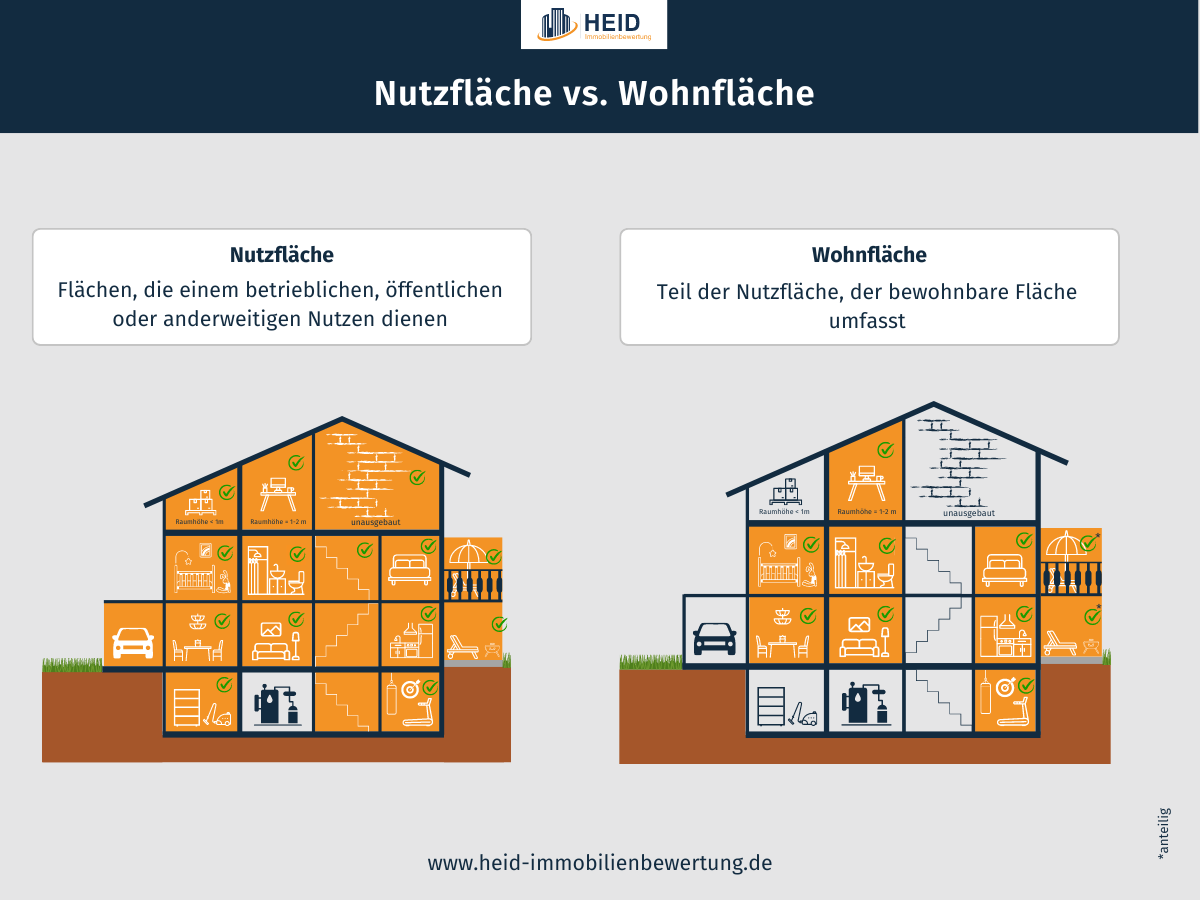

In [18]:
display(Image(filename='assets/wohnunutz.png'))

Es sind einige Variablen enthalten, die für die Ermittlung der Nutzungsfläche von Hilfe sein können:
* wohnfläche
* keller
* zimmeranzahl
* parkplatz

Die Wohnfläche berechnet sich gemäß **§ 3 WoFlV** folgendermaßen:

$$
\text{Wohnfläche} \;=\;
\sum_{\substack{\text{Raumteile}\\ h \ge 2{,}00\,\mathrm{m}}} A
\;+\;
0{,}5 \;\sum_{\substack{\text{Raumteile}\\ 1{,}00 \le h < 2{,}00\,\mathrm{m}}} A
\;+\;
0 \;\sum_{\substack{\text{Raumteile}\\ h < 1{,}00\,\mathrm{m}}} A
\;+\;
0{,}25 \;\sum A_{\text{Balkon/Loggia/Terrasse}}
$$

Die Nutzfläche berechnet sich nach **DIN 277** folgendermaßen:
$$
\text{Nutzfläche (NUF)} =
\sum A_{\text{Wohnräume}}
\;+\;
\sum A_{\text{Nebennutzräume}}
\;+\;
\sum A_{\text{sonstige Funktionsräume}}
$$

**Legende**
- \(A\) = Grundfläche des betrachteten Teilraums
- \(h\) = lichte Höhe des Teilraums
- Balkone, Loggien und Terrassen werden zu 25 % ihrer Fläche angerechnet

Wichtig zu erwähnen ist, dass die Berechnung der Nutzfläche die Wohnfläche als Zwischenwert nicht genutzt wird, sondern "neu" berechnet wird, weil die Wohnfläche Balkone nur anteilig zurechnet und nach lichter Höhe differenziert.

Die Frage, die sich nun stellt, ist es möglich, basierend auf gegebenen Variablen und relativ simplen und einfachen Regeln die Nutzfläche zu schätzen?


Folgende Regeln und Annahmen werden getätigt:
* Da die Anzahl der Etagen fehlen, wird angenommen jedes Haus 3 Etagen besitzt, wodurch ein Treppenhaus annehmbar ist
* Bei einem 3 Etagen Gebäude ist ein Balkon vorhanden, welches auf 7 m² geschätzt wird
* Ein Keller ist so groß, wie 30 % der Wohnfläche → Bei 3 Etagen wird der Keller als zusätzliche Etage gezählt, daher von 3 auf 4 somit ein Zuwachs von ca. 30 %

_Die Etagenzahl sowie die Flächen von Balkon und Keller wurden in Abstimmung mit einem Bauingenieur für Statik geschätzt. [LinkedIn Profil](https://www.linkedin.com/in/enis-kaya-8320b3351/)_

Nun geht es an die Auswahl geeigneter Variablen, mit denen eine Formel zur Bestimmung der Nutzfläche möglich ist:

| Variable     | Wird zur Berechnung verwendet? | Begründung                                                                 |
|:-------------|:------------------------------:|-----------------------------------------------------------------------------|
| Wohnfläche   | Ja                             | Es ermöglicht einen guten Anfangspunkt, auf dem aufgebaut werden kann, die meisten Räume sind enthalten. |
| Nebenräume   | Nein                           | Kellerräume können auch aufgeführt werden, aber der Keller ist schon geschätzt worden. |
| Balkon       | Ja                             | Der Balkon ist nur anteilig in der Wohnfläche eingebunden.                  |
| Zimmeranzahl | Nein                           | Die Wohnfläche enthält bereits die Fläche der Zimmer.                       |
| Parkplatz    | Nein                           | Ein Parkplatz kann eine Garage oder ein offener Stellplatz sein, zu ungenau. |

Nach Auswahl geeigneter Variablen wird folgende Formel aufgestellt:

$$
\text{Nutzfläche (NUF)}
=
\text{Wohnfläche}\;
\;+\;
\text{Wohnfläche}\;\times\;0.3\times\text{Keller}
\;+\;7
$$

Als Grundlage wird die Wohnfläche genutzt, wenn ein Keller vorhanden sein sollte (boolesche Variable), dann wird anteilig 30 % der Wohnfläche hinzuaddiert und am Ende wird immer 7 m² für einen Balkon hinzuaddiert.

Bevor die Umsetzung erfolgt, werden die Spalten **nutzflaeche** und **wohnflaeche** betrachtet.


In [19]:
c_df[['wohnflaeche','nutzflaeche','keller']]

wohnflaeche    nutzflaeche keller
2           190.00          163.0     No
5           128.29         136.09     No
6           140.00  Other missing     No
8           182.00  Other missing     No
9           240.00          120.0     No
...            ...            ...    ...
390287      539.00  Other missing     No
390288      105.00  Other missing     No
390292      151.00  Other missing     No
390293      150.00  Other missing    Yes
390295      187.91  Other missing     No

[295745 rows x 3 columns]

Interessanterweise kann beobachtet werden, dass teilweise die Nutzfläche kleiner ist als die Wohnfläche. Dies ist eine Andeutung auf eine nicht korrekte Dateneingabe nach **§ 3 WoFlV** und oder **DIN 277**.

Hieraus abgeleitet muss das Vorgehen etwas überdacht werden. Die Variable **nutzflache** wird entfernt und nicht mehr verwendet, stattdessen wird eine neue Spalte **din_277** erstellt, welche basierend auf der zuvor erstellten Formel die Nutzfläche für **alle** Datenpunkte berechnet.

Zwar könnte angeführt werden, wenn die Nutzfläche größer als die Wohnfläche ist, könnten die Daten korrekt nach **§ 3 WoFlV** und oder **DIN 277** berechnet sein. Diese Annahme wird hier jedoch nicht getroffen, weil alle Datenpunkte identisch behandelt werden sollen.

In [20]:
c_df['din_277'] = c_df.apply(
    lambda row: (row['wohnflaeche'] + 7)
                if (row['keller'] == 'No')
                else (1.3 * row['wohnflaeche'] + 7),
    axis=1
)

c_df['nutzflaeche'] = pd.to_numeric(c_df['nutzflaeche'], errors='coerce')

print('Ausschnitt der neuen Spalte mit der Wohnfläche und Keller')
display(c_df[['wohnflaeche','keller','din_277']])
# Entfernen von nutzflaeche
c_df.drop('nutzflaeche', axis=1, inplace=True)
# Überprüfen der Nullwerte
print("Finale überprüfung der Nullwerte")
zwischenstand = na_df(c_df).sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[['Spalte','NA Anteil (%) ohne 0']])


Ausschnitt der neuen Spalte mit der Wohnfläche und Keller


wohnflaeche keller  din_277
2           190.00     No   197.00
5           128.29     No   135.29
6           140.00     No   147.00
8           182.00     No   189.00
9           240.00     No   247.00
...            ...    ...      ...
390287      539.00     No   546.00
390288      105.00     No   112.00
390292      151.00     No   158.00
390293      150.00    Yes   202.00
390295      187.91     No   194.91

[295745 rows x 3 columns]

Finale überprüfung der Nullwerte


Spalte  NA Anteil (%) ohne 0
0                        obid                   0.0
1                         plz                   0.0
2                   kaufpreis                   0.0
3                     baujahr                   0.0
4       letzte_modernisierung                   0.0
5                 wohnflaeche                   0.0
6         grundstuecksflaeche                   0.0
7                zimmeranzahl                   0.0
8                laufzeittage                   0.0
9                        hits                   0.0
10      click_schnellkontakte                   0.0
11          click_weitersagen                   0.0
12                  click_url                   0.0
13                 liste_show                   0.0
14                liste_match                   0.0
15              immobilientyp                   0.0
16              denkmalobjekt                   0.0
17           einliegerwohnung                   0.0
18                 ferienhaus                   0.0
19                   gaestewc                   0.0
20              kaufvermietet                   0.0
21                     keller                   0.0
22                  parkplatz                   0.0
23           rollstuhlgerecht                   0.0
24                   bauphase                   0.0
25                ausstattung                   0.0
26     energieeffizienzklasse                   0.0
27          energieausweistyp                   0.0
28                heizungsart                   0.0
29             kategorie_Haus                   0.0
30              objektzustand                   0.0
31                   ergg_1km                   0.0
32                       blid                   0.0
33                    gid2019                   0.0
34                    kid2019                   0.0
35                       bef1                   0.0
36                   anbieter                   0.0
37                      spell                   0.0
38                   hits_gen                   0.0
39  click_schnellkontakte_gen                   0.0
40      click_weitersagen_gen                   0.0
41              click_url_gen                   0.0
42             liste_show_gen                   0.0
43            liste_match_gen                   0.0
44                       adat                   0.0
45                       edat                   0.0
46                  price_sqm                   0.0
47                    din_277                   0.0

Nun wurden alle Nullwerte aus dem Datensatz entfernt. Als Nächstes gilt es die Variablen dem richtigen Datentypen zuzuordnen.

In [21]:
uniques = c_df.columns
unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

non_numeric_columns = np.concatenate((unique_df[unique_df['Anzahl'] <= 14]['Spalte'].values, np.array(['kategorie_Haus', 'bef1', 'edat', 'adat', 'ergg_1km'])), axis=None)

numeric_columns = unique_df[~ unique_df['Spalte'].isin(non_numeric_columns)]['Spalte'].values

for col in numeric_columns:
    c_df[col] = pd.to_numeric(c_df[col])

unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

print('Anzahl Spalten: ', len(c_df.columns))
print('Anzahl Zeilen: ', len(c_df))


Spalte  \
15              immobilientyp   
22                  parkplatz   
21                     keller   
20              kaufvermietet   
19                   gaestewc   
18                 ferienhaus   
17           einliegerwohnung   
16              denkmalobjekt   
23           rollstuhlgerecht   
27          energieausweistyp   
24                   bauphase   
25                ausstattung   
36                   anbieter   
26     energieeffizienzklasse   
30              objektzustand   
32                       blid   
28                heizungsart   
34                    kid2019   
33                    gid2019   
29             kategorie_Haus   
35                       bef1   
37                      spell   
7                zimmeranzahl   
11          click_weitersagen   
45                       edat   
44                       adat   
4       letzte_modernisierung   
12                  click_url   
3                     baujahr   
10      click_schnellkontakte   
8                laufzeittage   
1                         plz   
31                   ergg_1km   
6         grundstuecksflaeche   
40      click_weitersagen_gen   
5                 wohnflaeche   
47                    din_277   
9                        hits   
41              click_url_gen   
2                   kaufpreis   
39  click_schnellkontakte_gen   
46                  price_sqm   
13                 liste_show   
38                   hits_gen   
14                liste_match   
42             liste_show_gen   
43            liste_match_gen   
0                        obid   

                  Einzigartige Werte (ohne Nullwerte)  Anzahl        Datentyp  
15                                        [House-buy]       1        category  
22                                          [Yes, No]       2          object  
21                                          [No, Yes]       2          object  
20                                          [No, Yes]       2          object  
19                                          [No, Yes]       2          object  
18                                          [No, Yes]       2          object  
17                                          [Yes, No]       2          object  
16                                          [No, Yes]       2          object  
23                                          [No, Yes]       2          object  
27  [Not specified, Energy use [Energieverbauchske...       3        category  
24  [Not specified, House built, House in process ...       4        category  
25  [Not specified, Sophisticated, Normal, Simple,...       5        category  
36  [Unknown, Real-estate agent , Financial sector...       9          object  
26     [Not specified, E, D, A, H, F, G, APLUS, C, B]      10        category  
30  [Well-kept, First occupancy, Not specified, Li...      11        category  
32  [Hamburg, Lower Saxony, North Rhine-Westphalia...      13        category  
28  [Central heating, Not specified, Self-containe...      14        category  
34  [2000, 3241, 4011, 5111, 5112, 5113, 5315, 591...      15        category  
33  [2000000.0, 3241001.0, 4011000.0, 5111000.0, 5...      15        category  
29  [Two-family house, Single-family house, Mansio...      16        category  
35  [No_Information, NO_INFORMATION , GAS , OIL , ...      27          object  
37  [1, 2, 7, 3, 4, 5, 6, 9, 8, 10, 12, 11, 17, 13...      40        category  
7   [5.5, 5.0, 7.5, 10.0, 4.0, 7.0, 3.0, 3.5, 4.5,...      60        category  
11  [0, 1, 10, 2, 6, 7, 5, 4, 3, 12, 8, 11, 16, 9,...      61        category  
45  [2007-01-01 00:00:00, 2007-07-01 00:00:00, 200...     204  datetime64[ns]  
44  [2007-01-01 00:00:00, 2007-06-01 00:00:00, 200...     204  datetime64[ns]  
4   [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....     300          object  
12  [0, 8, 2, 1, 16, 3, 41, 4, 6, 5, 27, 7, 29, 14...     304        category  
3   [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....     337        category  
10  [

Spalte  \
15              immobilientyp   
22                  parkplatz   
21                     keller   
20              kaufvermietet   
19                   gaestewc   
18                 ferienhaus   
17           einliegerwohnung   
16              denkmalobjekt   
23           rollstuhlgerecht   
27          energieausweistyp   
24                   bauphase   
25                ausstattung   
36                   anbieter   
26     energieeffizienzklasse   
30              objektzustand   
32                       blid   
28                heizungsart   
34                    kid2019   
33                    gid2019   
29             kategorie_Haus   
35                       bef1   
37                      spell   
7                zimmeranzahl   
11          click_weitersagen   
45                       edat   
44                       adat   
4       letzte_modernisierung   
12                  click_url   
3                     baujahr   
10      click_schnellkontakte   
8                laufzeittage   
1                         plz   
31                   ergg_1km   
6         grundstuecksflaeche   
40      click_weitersagen_gen   
5                 wohnflaeche   
47                    din_277   
9                        hits   
41              click_url_gen   
2                   kaufpreis   
39  click_schnellkontakte_gen   
46                  price_sqm   
13                 liste_show   
38                   hits_gen   
14                liste_match   
42             liste_show_gen   
43            liste_match_gen   
0                        obid   

                  Einzigartige Werte (ohne Nullwerte)  Anzahl        Datentyp  
15                                        [House-buy]       1        category  
22                                          [Yes, No]       2          object  
21                                          [No, Yes]       2          object  
20                                          [No, Yes]       2          object  
19                                          [No, Yes]       2          object  
18                                          [No, Yes]       2          object  
17                                          [Yes, No]       2          object  
16                                          [No, Yes]       2          object  
23                                          [No, Yes]       2          object  
27  [Not specified, Energy use [Energieverbauchske...       3        category  
24  [Not specified, House built, House in process ...       4        category  
25  [Not specified, Sophisticated, Normal, Simple,...       5        category  
36  [Unknown, Real-estate agent , Financial sector...       9          object  
26     [Not specified, E, D, A, H, F, G, APLUS, C, B]      10        category  
30  [Well-kept, First occupancy, Not specified, Li...      11        category  
32  [Hamburg, Lower Saxony, North Rhine-Westphalia...      13        category  
28  [Central heating, Not specified, Self-containe...      14        category  
34  [2000, 3241, 4011, 5111, 5112, 5113, 5315, 591...      15           int64  
33  [2000000.0, 3241001.0, 4011000.0, 5111000.0, 5...      15         float64  
29  [Two-family house, Single-family house, Mansio...      16        category  
35  [No_Information, NO_INFORMATION , GAS , OIL , ...      27          object  
37  [1, 2, 7, 3, 4, 5, 6, 9, 8, 10, 12, 11, 17, 13...      40           int64  
7   [5.5, 5.0, 7.5, 10.0, 4.0, 7.0, 3.0, 3.5, 4.5,...      60         float64  
11  [0, 1, 10, 2, 6, 7, 5, 4, 3, 12, 8, 11, 16, 9,...      61           int64  
45  [2007-01-01 00:00:00, 2007-07-01 00:00:00, 200...     204  datetime64[ns]  
44  [2007-01-01 00:00:00, 2007-06-01 00:00:00, 200...     204  datetime64[ns]  
4   [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....     300         float64  
12  [0, 8, 2, 1, 16, 3, 41, 4, 6, 5, 27, 7, 29, 14...     304           int64  
3   [1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....     337         float64  
10  [

Anzahl Spalten:  48
Anzahl Zeilen:  295745


In [22]:
f_df = c_df.copy()
f_df['baujahr'] = f_df['baujahr'].astype(int)
f_df['kaufpreis'] = f_df['kaufpreis'].astype(int)

Nun ist der gesamte Datensatz aufbereitet und kann für die Untersuchung der Thesen verwendet werden.
Der Finale Datensatz enthält 48 Variablen und 295 745 einzelne Datenpunkte.

## Untersuchung des Datensatzes und kleiner Thesen

In diesem Teil werden einige kleine Thesen untersucht, welche nicht direkt mit der Zielsetzung verbunden sind. Das Ziel ist es eher, welche weitere Erkenntnis aus dem Datensatz gewonnen werden kann.

### Auswirkung der Digitalisierung auf Inserate
Durch die Digitalisierung der Welt, steigt unter anderem die Internetnutzung, daher wäre auch ein Anstieg von Inseraten pro Jahr zu erwarten, dies gilt es nun zu untersuchen.

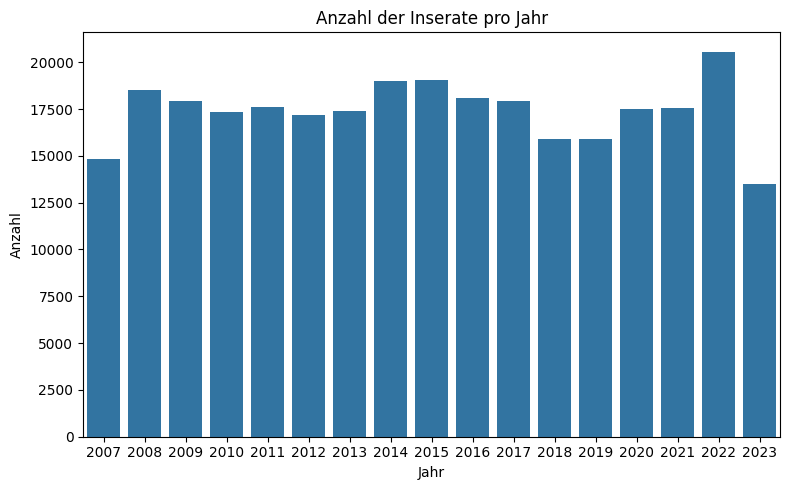

In [23]:
t_df = f_df.copy()
t_df['Jahr'] = t_df['adat'].dt.year
counts_per_year = t_df['Jahr'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x=counts_per_year.index.astype(int),
    y=counts_per_year.values
)
plt.title("Anzahl der Inserate pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()



Basierend auf der Abbildung kann nicht gesagt werden, dass durch die Digitalisierung die Anzahl der Inserate über die Jahre zunimmt. Die Anzahl der Inserate bewegt sich zwischen 15 000 und 20 000 Inseraten pro Jahr. 2023 ist eine starke Differenz zu erkennen, von einem Maximum geht es in ein Minimum über. Eine mögliche Erklärung könnten hierbei die Leitzinsen sein. Dies gilt es nun im nächsten Abschnitt zu untersuchen.

### Auswirkung der Leitzinsen und Inflation auf Inserate
Wie im vorherigen Abschnitt erklärt wird neben der Anzahl der Inserate pro Jahr mit den Leitzinsen der jeweiligen Jahre verglichen. Hinzugezogen werden die Leitzinsen der amerikanischen Zentralbank (FED) sowie der Europäischen Zentralbank. Im Genaueren wird der Hauptrefinanzierungszins verwendet, welcher den Zins beschreibt, in dem Banken Geld von einer Zentralbank leihen können. Der Zins hat dabei einen direkten Einfluss auf Kredite, je höher der Zins, desto teurer können Banken die Kredite anbieten. Immobilien werden typischerweise durch eine Finanzierung über ein Darlehn erworben. Daher sollte eine Abhängigkeit zischen Immobilien inseraten und den Leitzinsen existieren.

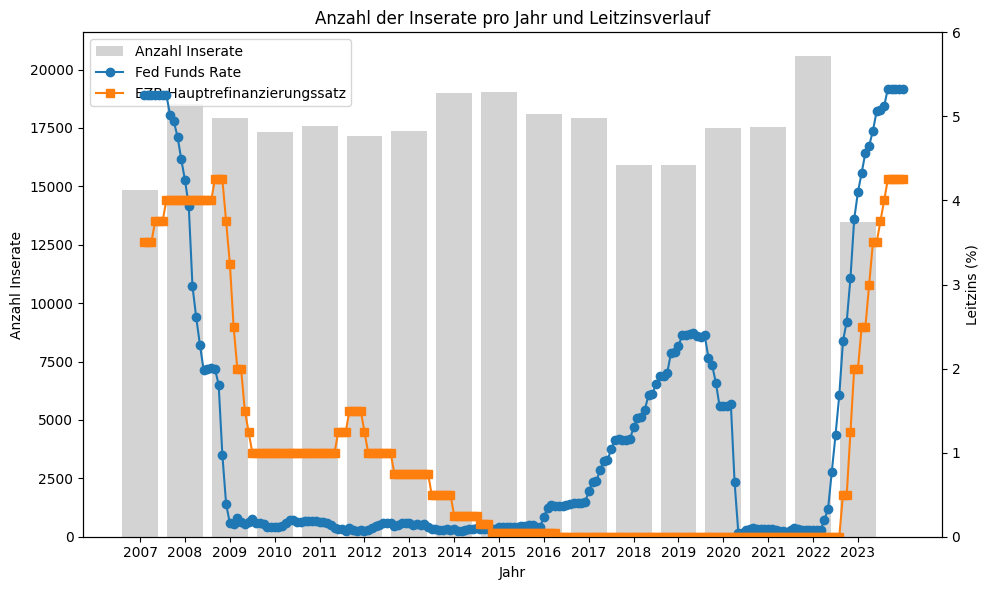

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Deine Jahres‐Counts ---
t_df = f_df.copy()
t_df['Jahr'] = t_df['adat'].dt.year
counts = t_df['Jahr'].value_counts().sort_index()

# --- Zinsdaten ---
fed = pd.read_csv('fed.csv')
ezb = pd.read_csv('ezb.csv')

datum = pd.to_datetime(fed.Monat, format='%Y-%m-%d')
fed_s = pd.Series(fed.Zins.values, index=datum, name='FED')
ezb_s = pd.Series(ezb.Hauptrefinanzierungssatz.values, index=datum, name='EZB')

# Numerische X‐Achse:
fed_x = fed_s.index.year + fed_s.index.month/12
ezb_x = ezb_s.index.year + ezb_s.index.month/12

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Balken (linke Achse)
ax1.bar(
    counts.index.astype(int),
    counts.values,
    color='lightgray',
    label='Anzahl Inserate'
)
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Anzahl Inserate')
ax1.set_xticks(counts.index.astype(int))

# Linien (rechte Achse)
ax2 = ax1.twinx()
ax2.plot(fed_x, fed_s.values, marker='o', label='Fed Funds Rate')
ax2.plot(ezb_x, ezb_s.values, marker='s', label='EZB Hauptrefinanzierungssatz')
ax2.set_ylabel('Leitzins (%)')
ax2.set_ylim(0, 6)

# gemeinsame Legende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Anzahl der Inserate pro Jahr und Leitzinsverlauf')
plt.tight_layout()
plt.show()


Klar zu erkennen ist, dass ab 2023 die Leitzinsen stark erhöht wurden, gleichzeitig ist die Anzahl der Inserate stark zurückgegangen, von einem Maximum zu einem Minimum. Jedoch ist eine starke Korrelation nicht zu erkennen. 2008 bis 2010 sind die Leitzinsen gefallen, jedoch gab es keine Zunahme an Instate, im Gegenteil sogar eine Abnahme. Daraus resultierend kann kein Kausalzusammenhang abgeleitet werden. Es müssen weitere Faktoren einfließen.

Typischerweise versuchen Zentralbanken die Inflation und die Wirtschaft durch Leitzinsanpassungen stabil zu halten. Daher wird als nächstes die Inflation miteinbezogen.

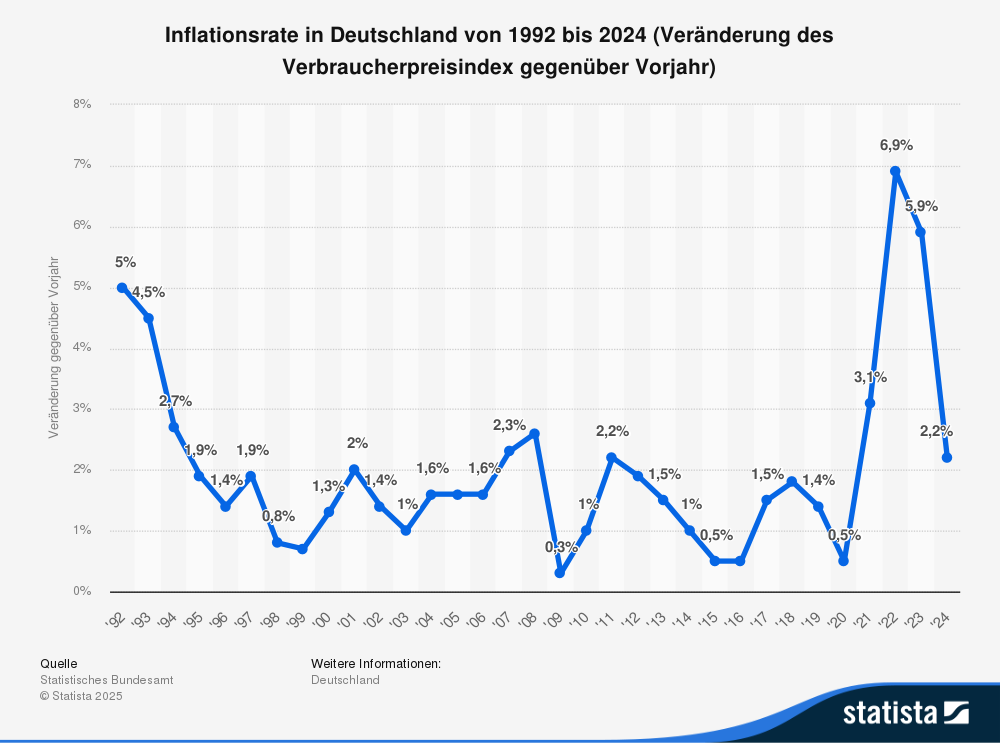

In [25]:
display(Image(filename='assets/inflation.png'))


Zu erkennen ist ein rasanter Anstieg der Inflationsrate 2022, welcher mit dem Russland-Ukraine-Krieg erklärt werden könnte. Basierend auf der Inflation wurden die Leitzinsen nachträglich stark nachgezogen. Aber auch hier ist kein Kausalzusammenhang zu der Anzahl der Inserate auffindbar, wenn 2008,2009 und 2015, 2016 betrachtet werden.

Daher kann gesagt werden, dass die Anzahl der Inserate nicht durch bzw. nicht nur durch die Leitzinsen und Inflation beeinflusst wird.

Dadurch, dass keine Korrelation besteht, stellt sich nun die Frage, ist eine Saisonalität in dem Datensatz, in einer Zeitreihenbetrachtung erkennbar? Das Ziel ist es konkret zu untersuchen, ob die Inserate Azyklisch eingestellt werden, oder es Monate gibt in denen bevorzugt mehr Inserate eingestellt werden.

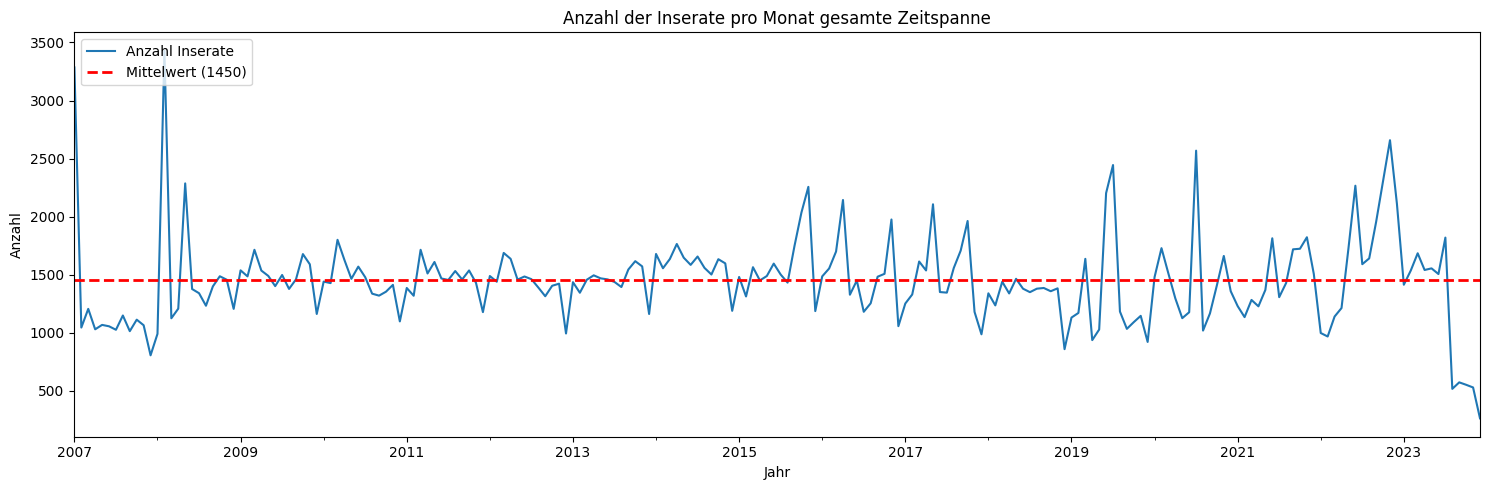

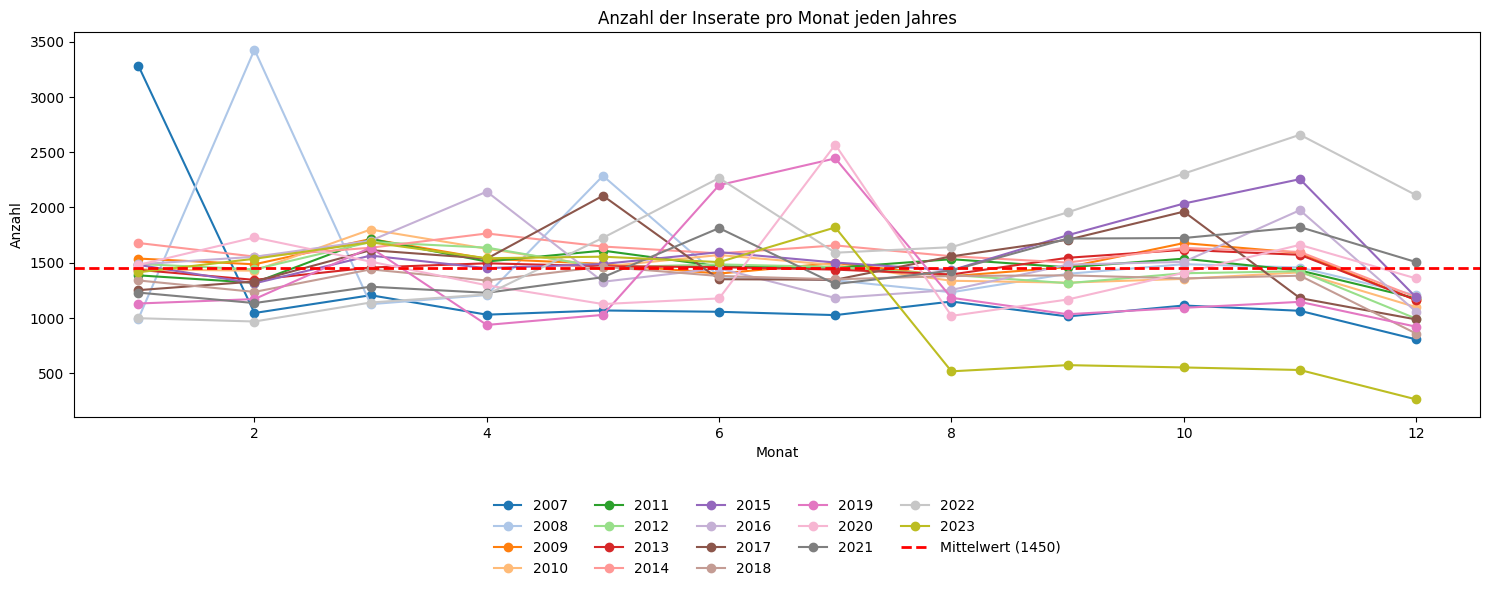

In [26]:
t_df = f_df.copy()
t_df['Jahr'] = t_df['adat'].dt.to_period('M')

counts_per_year = t_df['Jahr'].value_counts().sort_index()

count_ts = pd.Series(counts_per_year.values, index=counts_per_year.index.to_timestamp(), name="Anzahl Inserate")
count_ts.index = pd.DatetimeIndex(count_ts.index, count_ts.index.inferred_freq)

plt.figure(figsize=(15,5))
plt.title("Anzahl der Inserate pro Monat gesamte Zeitspanne")
# Durchschnitt berechnen
mean_val = count_ts.mean()


ax = count_ts.plot()
# Durchschnittslinie einzeichnen
ax.axhline(
    y=mean_val,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mittelwert ({mean_val:.0f})'
)

# Legende aktualisieren und anzeigen
ax.legend(loc='upper left')
plt.xlabel("Jahr")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()


palette = plt.get_cmap('tab20').colors[:17]

fig2, ax2 = plt.subplots(figsize=(15, 6))


years = list(range(2007, 2024))
for idx, y in enumerate(years):
    count_period = count_ts[str(y)]
    count_period.index = count_period.index.month
    count_period.plot(
        ax=ax2,
        label=str(y),
        color=palette[idx],
        marker='o'
    )
ax2.set_title("Anzahl der Inserate pro Monat jeden Jahres")
ax2.set_ylabel("Anzahl")
ax2.set_xlabel("Monat")
ax2.axhline(
    y=mean_val,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mittelwert ({mean_val:.0f})'
)
ax2.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),
    ncol=5,
    frameon=False
)

plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


Resultierend aus der Darstellung kann Folgendes abgeleitet werden:
* Es ist weder ein positiver noch negativer Trend erkennbar, es ist eher stagnierend
* Eine Saisonalität konnte nicht identifiziert werden, daher azyklisches Verhalten
* Pro Monat werden durchschnittlich 1 450 neue Inserate erstellt

### Zustand der Immobilien
In diesem Abschnitt werden die Zustände der Immobilien genauer betrachtet. Eine These wäre dabei, dass die ältesten Immobilien den schlechtesten Zustand besitzen. Zur Untersuchung wird nicht das Baujahr, sondern die letzte Modernisierung hinzugezogen.

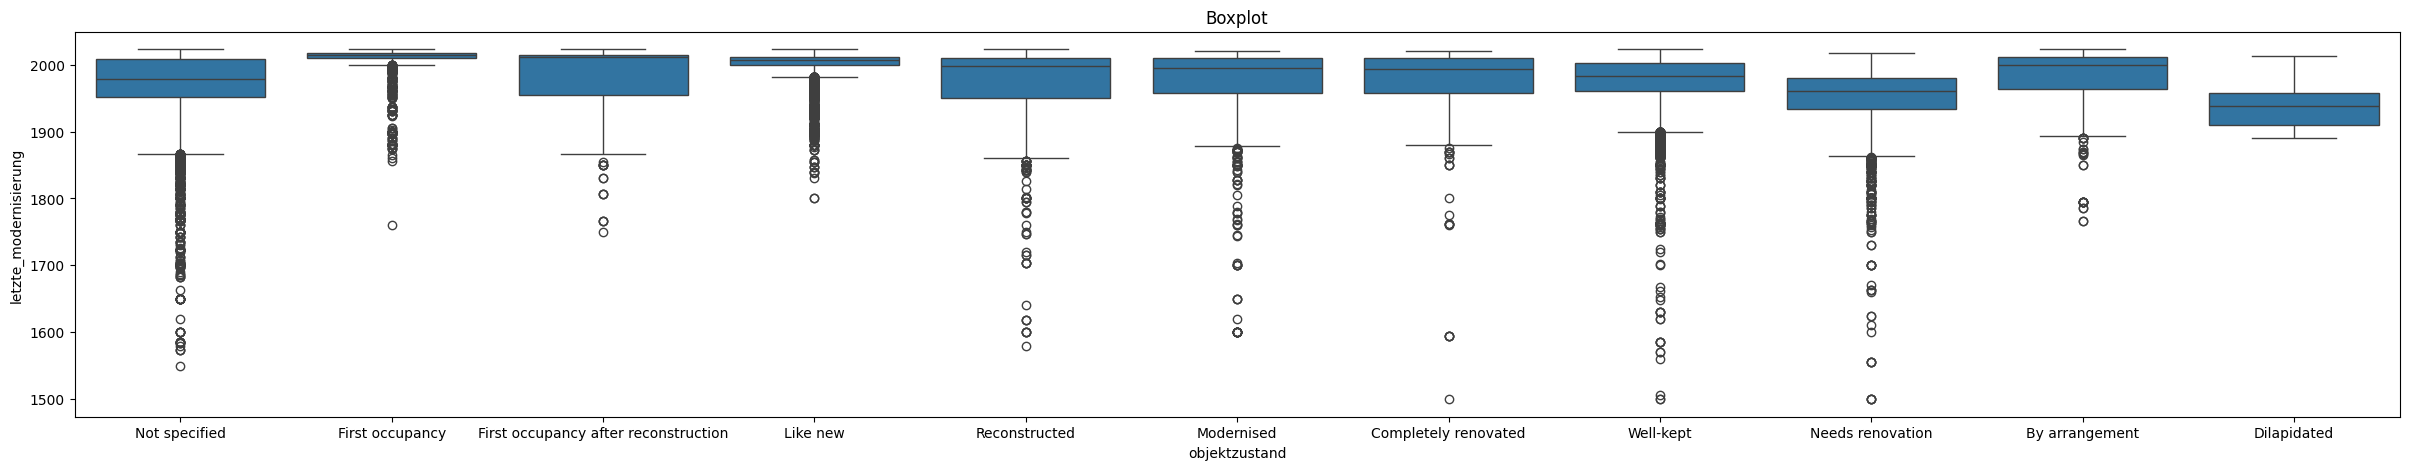

In [27]:
t_df = f_df.copy()

plt.figure(figsize=(30,5))
sns.boxplot(data=t_df, x='objektzustand', y='letzte_modernisierung')
plt.title('Boxplot')
plt.show()




Zum einen ist erkennbar, dass nicht alle Werte der Variable **objektzustand** den tatsächlichen Zustand der Immobilie wiedergeben, daher werden im Genaueren die Werte **Like new**, **Needs renovation** und **Dilapidated** angeschaut.

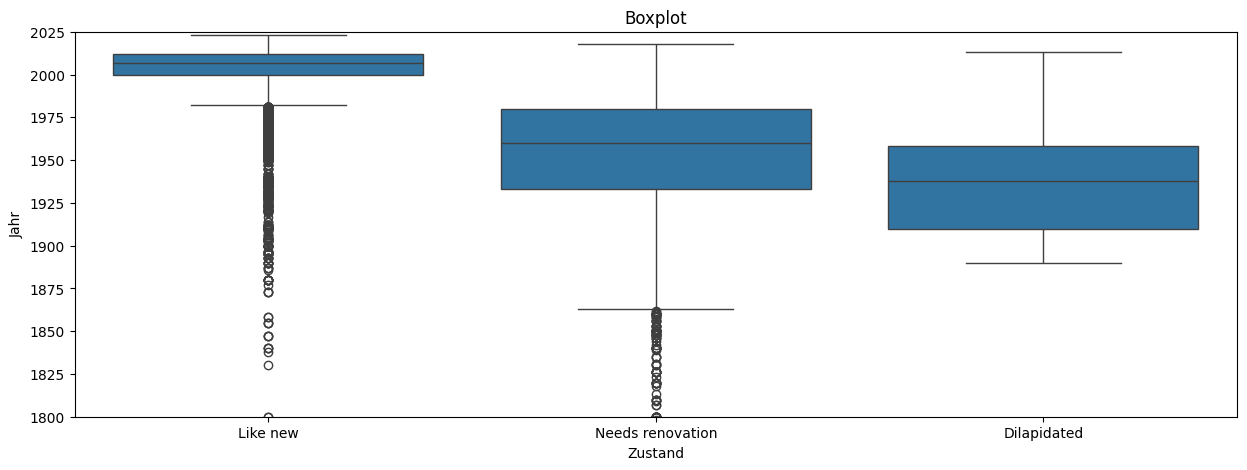

In [28]:
t_df = t_df[t_df['objektzustand'].isin(['Like new', 'Needs renovation', 'Dilapidated'])]

t_df['objektzustand'] = t_df['objektzustand'].cat.remove_unused_categories()

plt.figure(figsize=(15,5))
sns.boxplot(data=t_df, x='objektzustand', y='letzte_modernisierung')
plt.title('Boxplot')
plt.xlabel('Zustand')
plt.ylabel('Jahr')
plt.ylim(1800,2025)
plt.show()

Basierend auf der Auswahl der Werte kann die These bestätigt werden, dass ältere Immobilien einen schlechteren Zustand als besitzen neuere. Auffällig sind hierbei die Ausreißer bei **Like new**, als wären Häuser aus dem 19. Jahrhundert vergleichbar mit neuen modernen Häusern. Basierend auf den Ausreißern ist es noch mehr bizarrer, dass keine Ausreißer für den Wert **verfallen (Dilapidated)** existieren. Es könnte angenommen werden, dass inserierte Immobiler in der Regel besser bewertet werden, als sie in Wirklichkeit sind.

# Untersuchung der Zielvariable und Thesen
Im Folgenden wird die Zielvariable **kaufpreis** im Allgemeinen untersucht, sowie die in der Zielsetzung definierten Untersuchungspunkte genauer betrachtet.

## Betrachtung der Zielvariable
Wie erwähnt geht es nun um die genauere Analyse der Zielvariable.

Werte sind in tausend abgebildet:
count    295745.0
min          30.0
max        2700.0
mean        503.0
std         355.1
Name: kaufpreis, dtype: float64

Quantile:
0.25    259.0
0.50    398.0
0.75    645.0
Name: kaufpreis, dtype: float64


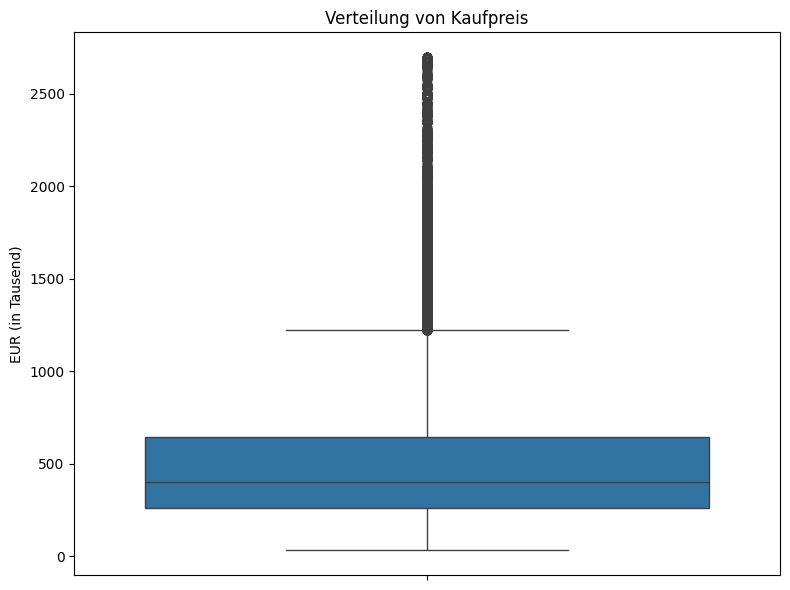

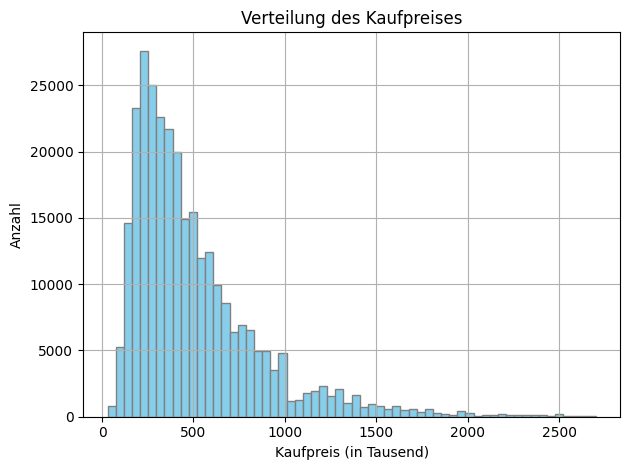

In [29]:
t_df = c_df.copy()
t_df['kaufpreis'] = t_df['kaufpreis']/1000
price_summary = t_df['kaufpreis'].agg(['count', 'min', 'max', 'mean', 'std']).round(1)
print("Werte sind in tausend abgebildet:")
print(price_summary)
print()
print("Quantile:")
print(t_df['kaufpreis'].quantile([0.25, 0.50, 0.75]))
plt.figure(figsize=(8, 6))
sns.boxplot(data=t_df['kaufpreis'])
plt.title("Verteilung von Kaufpreis")
plt.ylabel("EUR (in Tausend)")
plt.tight_layout()
plt.show()

t_df['kaufpreis'].hist(bins=60, color='skyblue', edgecolor='gray')
plt.title("Verteilung des Kaufpreises")
plt.xlabel("Kaufpreis (in Tausend)")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()


Zu erkennen ist Folgendes:
* eine positive Schiefe, die meisten Datenpunkte befinden sich an den niedrigen Werten
* zwischen 259 und 645 Tausend Euro befinden sich 50% aller Datenpunkte
* Die Ausreißer sind überwiegend nur in den höheren Werten vorhanden
* Differenz des Minimum und Maximum beträgt 2.670 Tausend Euro

Als nächstes wird die Zielvariable ins verhältnis zu der Erstellung des Inserates dargestellt.

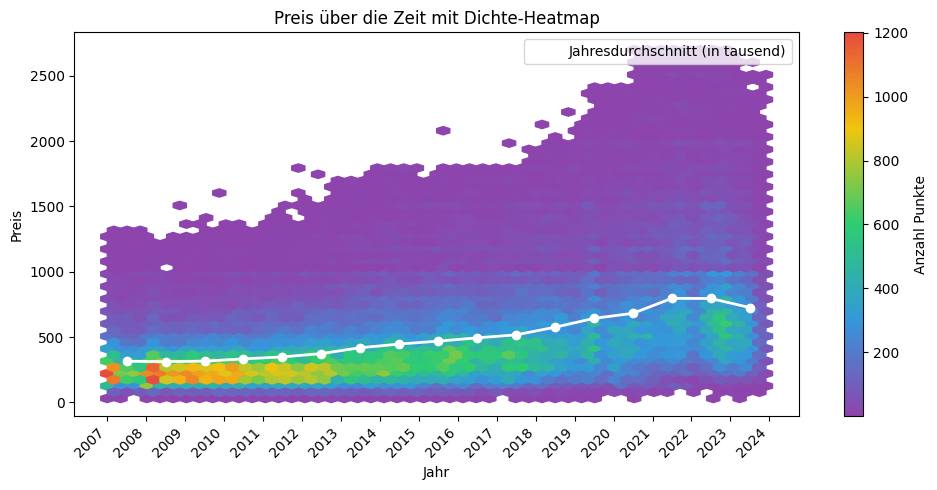

In [30]:

t_df = c_df.copy()
t_df['kaufpreis'] = t_df['kaufpreis']/1000
t_df['Jahr'] = t_df['adat'].dt.year
yearly_avg = t_df.groupby('Jahr')['kaufpreis'].mean().reset_index()
yearly_avg['Datum_Mitte'] = pd.to_datetime(yearly_avg['Jahr'].astype(str)) + pd.DateOffset(months=6)

x = mdates.date2num(t_df['adat'])    # Datum → float
y = t_df['kaufpreis']

palette = ["#8E44AD", "#3498DB", "#2ECC71", "#F1C40F", "#E74C3C"]
rain_cmap = LinearSegmentedColormap.from_list("ampel5", palette, N=256)
plt.figure(figsize=(10, 5))

hb = plt.hexbin(
    x, y,
    gridsize=50,
    cmap=rain_cmap,
    mincnt=1
)
cb = plt.colorbar(hb, label='Anzahl Punkte')


# 3. Achsen & Formatierung
plt.gca().xaxis_date()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')
plt.plot(
    yearly_avg['Datum_Mitte'],
    yearly_avg['kaufpreis'],
    color='white',
    marker='o',
    linewidth=2,
    label='Jahresdurchschnitt (in tausend)'
)
plt.xlabel('Jahr')
plt.ylabel('Preis')
plt.title('Preis über die Zeit mit Dichte-Heatmap')
plt.legend()
plt.tight_layout()
plt.show()

Zu erkennen ist ein deutlicher Trend, die Preise werden durchschnittlich mit jedem Jahr teurer, von 2007 bis 2021 hat der Durchschnittspreis kontinuierlich zugenommen, mit Ausnahme 2022 bis 2023. Durch die Heatmap kann abgeleitet werden, dass die Dichte der Datenpunkte über die Zeit abnimmt, konkret bedeutet dies, dass die Preisunterschiede zwischen den Inserierten Immobilien jedes Jahr zunehmen.

## Auswirkung der Barrierefreiheit auf den Verkaufspreis

Nun wird die Auswirkung der Barrierefreiheit auf den Verkaufspreis untersucht. Dabei wird folgende These aufgestellt:

Immobilien mit höherer Barrierefreiheit sind tendenziell teurer als solche ohne.

Als Variable wird **rollstuhlgerecht** hinzugezogen, die VVariable **aufzug** ist in dem verwendeten Datensatz nicht aufgeführt.
Auch hier wird die Zeitliche Komponente berücksichtigt.


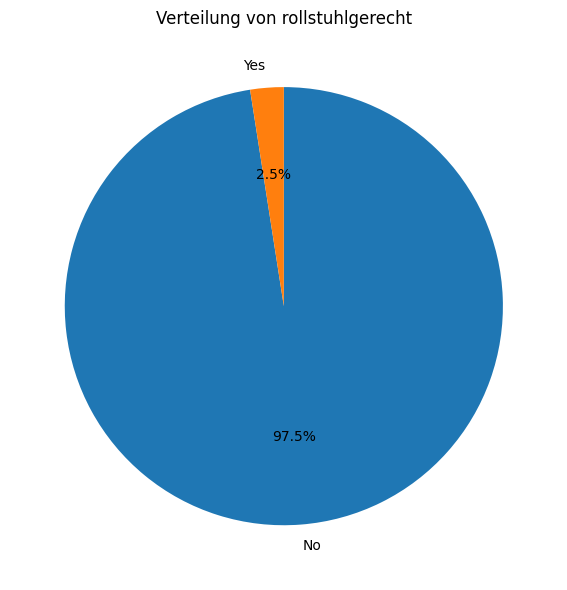

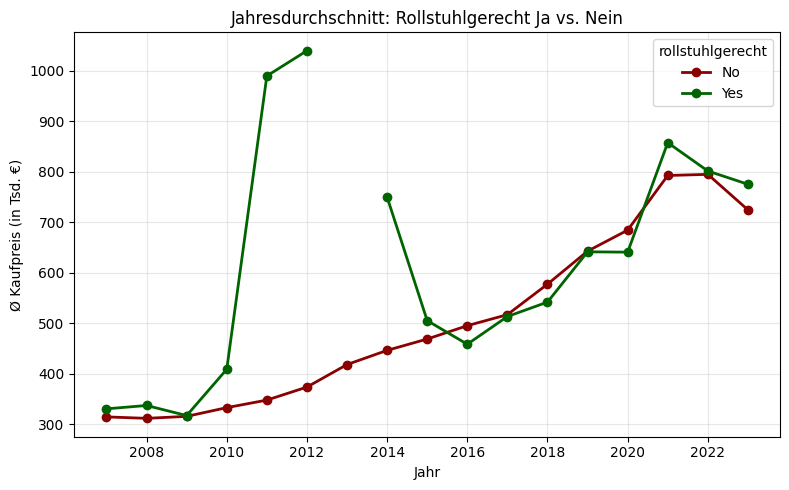

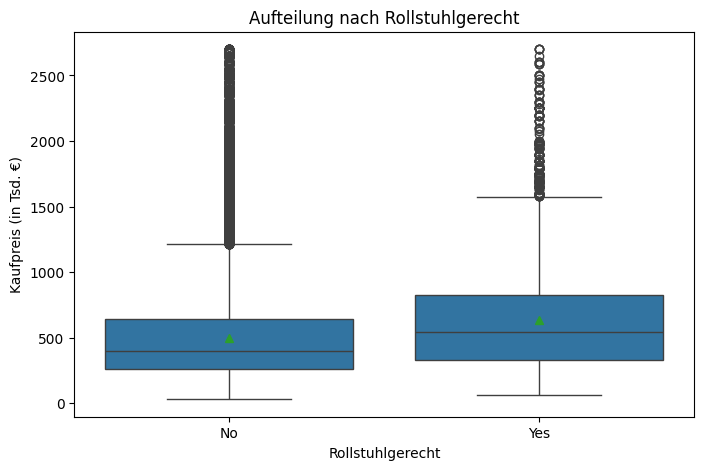

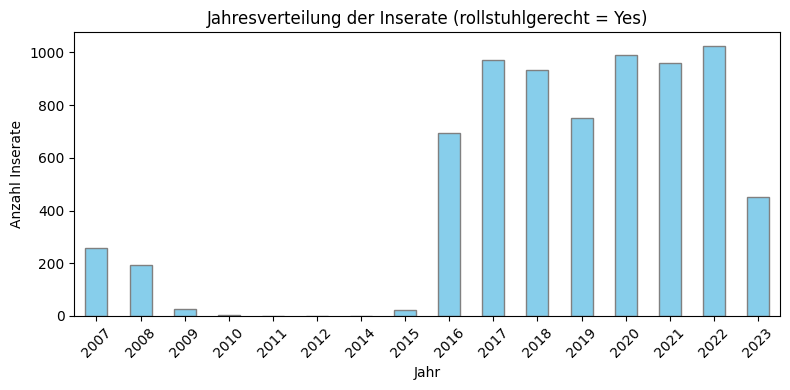

In [31]:
counts = t_df['rollstuhlgerecht'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',       # Prozentangabe mit einer Nachkommastelle
    startangle=90,           # Rotation, damit das erste Stück oben beginnt
    counterclock=False       # Drehrichtung: hier im Uhrzeigersinn
)
plt.title('Verteilung von rollstuhlgerecht')
plt.tight_layout()
plt.show()


# 1. Gruppieren
yearly_avg = (
    t_df
    .groupby(['Jahr', 'rollstuhlgerecht'])['kaufpreis']
    .mean()
    .reset_index()
)

yearly_pivot = yearly_avg.pivot(
    index='Jahr',
    columns='rollstuhlgerecht',
    values='kaufpreis'
)

plt.figure(figsize=(8,5))
for col, color in [('No','darkred'), ('Yes','darkgreen')]:
    plt.plot(
        yearly_pivot.index,
        yearly_pivot[col],
        marker='o',
        linewidth=2,
        label=col,
        color=color
    )

plt.xlabel('Jahr')
plt.ylabel('Ø Kaufpreis (in Tsd. €)')
plt.title('Jahresdurchschnitt: Rollstuhlgerecht Ja vs. Nein')
plt.legend(title='rollstuhlgerecht')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=t_df, y='kaufpreis', x='rollstuhlgerecht', showmeans=True)
plt.title('Aufteilung nach Rollstuhlgerecht')
plt.xlabel('Rollstuhlgerecht')
plt.ylabel('Kaufpreis (in Tsd. €)')
plt.show()

counts = (
    t_df[t_df['rollstuhlgerecht'] == "Yes"]
    ['Jahr']
    .value_counts()
    .sort_index()
)

# Barplot
plt.figure(figsize=(8,4))
counts.plot(kind='bar', color='skyblue', edgecolor='gray')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Inserate')
plt.title('Jahresverteilung der Inserate (rollstuhlgerecht = Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Der Anteil von Rollstuhlgerechten Immobilien im gesamten Datensatz ist relativ gering, bei 2,5 %.

In der anschließenden Gegenüberstellung der Durchschnittspreise pro Immobilie zeigt beim Blick auf die Boxplots, dass die Immobilien, welche Rollstuhlgerecht sind, eher teurer sind. Wird die zeitliche Komponente mitbetrachtet, kann beobachtet werden, dass die Durchschnittspreise nahezu identisch sind. Lediglich im Jahr 2011 und 2012 konnte eine massive Differenz der Durchschnittswerte beobachtet werden, dies könnte durch die zu geringen Datenpunkte in diesen Jahren entstanden sein. Aus der Jahresverteilung kann entnommen werden, dass die meisten rollstuhlgerechten Häuser zwischen 2016 und 2023 inseriert wurden.

Unter Berücksichtigung aller genannten Punkte wird die These anhand der Daten, welche von 2016 bis 2023 vorhanden sind, zur Überprüfung der These genutzt, weil in diesen Jahren relativ viele Datenpunkte vorhanden sind, und so der Durchschnittswert aussagekräftiger ist. Aufgrund dessen wird daher der Boxplot nicht in die Überprüfung miteinbezogen, weil dieser auch die Jahre 2007 bis 2015 enthält.

Im Gesamten kann gesagt werden, dass der Kaufpreis für Häuser, welche Rollstuhlgerecht sind, im Durchschnitt nicht signifikant teurer ist, auch kann nicht gesagt werden, dass dieser günstiger ist, obwohl stückweise zu erkennen ist, dass der Durchschnittspreis geringer ist, jedoch ist dies relativ gering, daher nicht signifikant genug. Deshalb wird die These verworfen, sprich die Rollstullgrechtheit, hat keinen signifikanten einfluss auf den Preis.

## Auswirkung der Region auf den Verkaufspreis
Als Nächstes wird ein Ranking der 15 Städte der Grundgesamtheit pro Jahr erstellt.

In [32]:
counts = t_df['plz'].value_counts()
print(t_df['plz'].unique.length)
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',       # Prozentangabe mit einer Nachkommastelle
    startangle=90,           # Rotation, damit das erste Stück oben beginnt
    counterclock=False       # Drehrichtung: hier im Uhrzeigersinn
)
plt.title('Verteilung von rollstuhlgerecht')
plt.tight_layout()
plt.show()

# 1. Gruppieren
yearly_avg = (
    t_df
    .groupby(['Jahr', 'plz'])['kaufpreis']
    .mean()
    .reset_index()
)

yearly_pivot = yearly_avg.pivot(
    index='Jahr',
    columns='plz',
    values='kaufpreis'
)

print(yearly_pivot)

plt.figure(figsize=(8,5))
for col, color in [('No','darkred'), ('Yes','darkgreen')]:
    plt.plot(
        yearly_pivot.index,
        yearly_pivot[col],
        marker='o',
        linewidth=2,
        label=col,
        color=color
    )

plt.xlabel('Jahr')
plt.ylabel('Ø Kaufpreis (in Tsd. €)')
plt.title('Jahresdurchschnitt: Rollstuhlgerecht Ja vs. Nein')
plt.legend(title='rollstuhlgerecht')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


AttributeError: 'function' object has no attribute 'length'

In [ ]:
import pandas as pd
import pgeocode
import folium
from folium.plugins import HeatMap

t_df['plz'] = t_df['plz'].astype(str)
# 1. Beispiel-DF
# t_df = pd.read_csv(...)

# 2. Postleitzahlen nach Lat/Lon auflösen (offline mit pgeocode)
nomi = pgeocode.Nominatim("de")
# Einmalig alle PLZ-Abfragen durchführen und cachen
plz_unique = t_df['plz'].astype(str).unique()
geo_df = nomi.query_postal_code(plz_unique)
# geo_df enthält u.a. Spalten latitude, longitude, postal_code

# 3. Merge zurück ins Original
geo_df = geo_df[['postal_code','latitude','longitude']].dropna()
geo_df.columns = ['plz','lat','lon']
t_df = t_df.merge(geo_df, on='plz', how='left').dropna(subset=['lat','lon'])

# 4. Heatmap-Daten vorbereiten
heat_data = t_df[['lat','lon']].values.tolist()

# 5. Karte bauen
m = folium.Map(location=[51.3,10.5], zoom_start=6)  # größen­gerecht zentriert
HeatMap(heat_data, radius=12, blur=15, min_opacity=0.3).add_to(m)

# 6. Ergebnis speichern oder direkt in Jupyter anzeigen
# m.save("plz_heatmap.html")
m  # in Jupyter-Notebooks zeigt Folium die interaktive Karte direkt an


In [ ]:
import pandas as pd
import pgeocode

t_df = c_df.copy()
t_df['kaufpreis'] = t_df['kaufpreis']/1000
t_df['Jahr'] = t_df['adat'].dt.year
# 1. Init pgeocode für Deutschland
nomi = pgeocode.Nominatim("de")

# 2. Einmalig alle PLZ-Abfragen durchführen
plz_unique = t_df['plz'].astype(str).unique()
geo = nomi.query_postal_code(plz_unique)

# geo enthält unter anderem Spalten:
#   postal_code, place_name, state_name, county_name, latitude, longitude

# Wir interessieren uns für postal_code und place_name (Stadt/Gemeinde)
geo_simple = geo[['postal_code','place_name']].dropna()
geo_simple.columns = ['plz','ort']

# 3. Merge zurück ins Original
t_df = t_df.astype({'plz': str}) \
         .merge(geo_simple, on='plz', how='left')

# Jetzt hast du in t_df die neue Spalte 'ort' mit dem Stadtnamen

# Jetzt hast du in t_df die neue Spalte 'ort' mit dem Stadtnamen
t_df['ort'] = (
    t_df['ort']
    .str.split('[- ,]')
    .str[0]
)
print(t_df['ort'].unique())
print(len(t_df['ort'].unique()))


['Hamburg' 'Oststeinbek' nan 'Uslar' 'Wedel' 'Ortsamt' 'Reinbek'
 'Ahrensburg' 'Glinde' 'Greenpeace' 'Bokholt' 'Neuendeich' 'Strathmann'
 'Heidenau' 'Rellingen' 'Frankfurt' 'Ammersbek' 'Tespe' 'Henstedt'
 'Tangstedt' 'Neumünster' 'Großhansdorf' 'Wiesbaden' 'Nützen' 'Berendsohn'
 'Rosengarten' 'Norderstedt' 'Marschacht' 'Seevetal' 'Kutenholz' 'Hasloh'
 'Donaueschingen' 'Karft' 'Linde' 'Getriebebau' 'Geesthacht' 'Bargfeld'
 'HZK' 'Schenefeld' 'Neu' 'Barsbüttel' 'Hannover' 'Langenhagen' 'Sehnde'
 'Isernhagen' 'Ronnenberg' 'Wunstorf' 'Hemmingen' 'Havelberg' 'Seelze'
 'Deutsche' 'Lehrte' 'Apelern' 'Wennigsen' 'Garbsen' 'Salzbergen'
 'Sarstedt' 'Laatzen' 'Elze' 'Burgwedel' 'Pattensen' 'Niedersächsisches'
 'VB' 'Bremen' 'Ritterhude' 'Lilienthal' 'Schwanewede' 'Achim' 'Bamberg'
 'Stuhr' 'Hoya' 'Oyten' 'V.A.G.' 'Winit' 'Ottersberg' 'Bramstedt'
 'Wildeshausen' 'Buchholz' 'Varel' 'Grasberg' 'wpd' 'AS' 'Heinze'
 'Osterholz' 'Düsseldorf' 'Meerbusch' 'Duisburg' 'Kaarst' 'Heiligenhaus'
 'Mönchengladb

## Auswirkung der Leitzinsen auf den Verkaufspreis
Zuvor wurde die Auswirkung der Leitzinsen auf die Anzahl der Inserate untersucht, nun wird dies für die Zielvariable erneut durchgeführt.

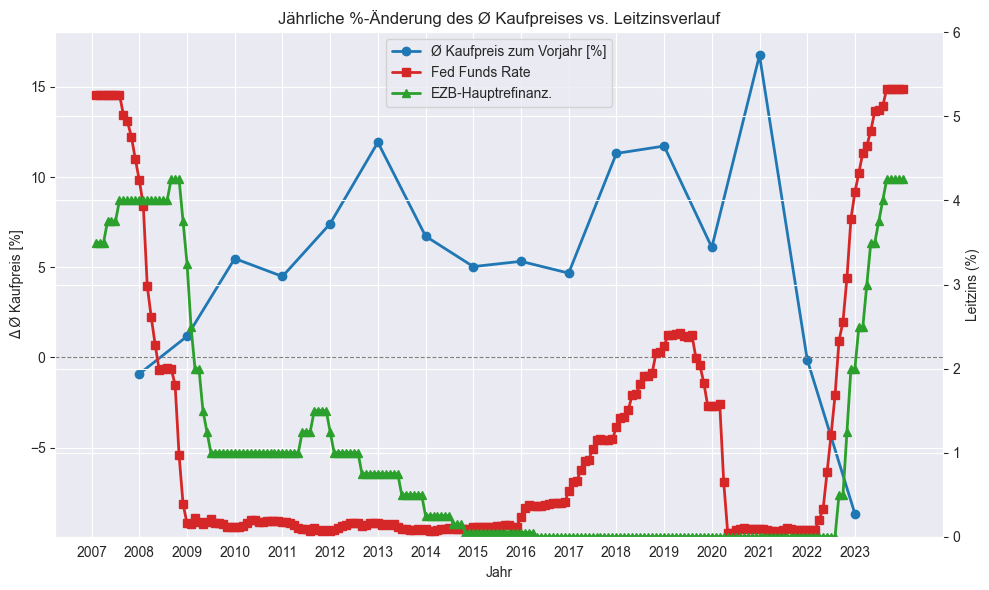

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Deine Jahres-Durch­schnitts-Daten ---
t_df = f_df.copy()
t_df['Jahr'] = t_df['adat'].dt.year
t_df['kaufpreis'] = t_df['kaufpreis'] / 1000
yearly_avg = (
    t_df
    .groupby('Jahr')['kaufpreis']
    .mean()
    .reset_index()
)

# Prozentuale Änderung zum Vorjahr berechnen
yearly_avg['pct_change'] = yearly_avg['kaufpreis'].pct_change() * 100

# --- Zinsdaten laden und aufbereiten ---
fed = pd.read_csv('fed.csv')
ezb = pd.read_csv('ezb.csv')
fed['Datum'] = pd.to_datetime(fed.Monat)
ezb['Datum'] = pd.to_datetime(ezb.Monat)
fed_x = fed.Datum.dt.year + fed.Datum.dt.month/12
ezb_x = ezb.Datum.dt.year + ezb.Datum.dt.month/12

# --- Plot: Alle drei Linien auf einmal ---
fig, ax1 = plt.subplots(figsize=(10,6))

# 1) %-Änderung Kaufpreis (linke Achse)
ax1.plot(
    yearly_avg['Jahr'],
    yearly_avg['pct_change'],
    marker='o',
    linewidth=2,
    label='Ø Kaufpreis zum Vorjahr [%]',
    color='tab:blue'
)
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Δ Ø Kaufpreis [%]')
ax1.set_xticks(yearly_avg['Jahr'])
ax1.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Null-Linie

# 2) Zweite Achse für Leitzinsen
ax2 = ax1.twinx()
ax2.plot(fed_x, fed.Zins,
         marker='s', linewidth=2, label='Fed Funds Rate', color='tab:red')
ax2.plot(ezb_x, ezb.Hauptrefinanzierungssatz,
         marker='^', linewidth=2, label='EZB-Hauptrefinanz.', color='tab:green')
ax2.set_ylabel('Leitzins (%)')
ax2.set_ylim(0, 6)

# 3) Gemeinsame Legende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

plt.title('Jährliche %-Änderung des Ø Kaufpreises vs. Leitzinsverlauf')
plt.tight_layout()
plt.show()


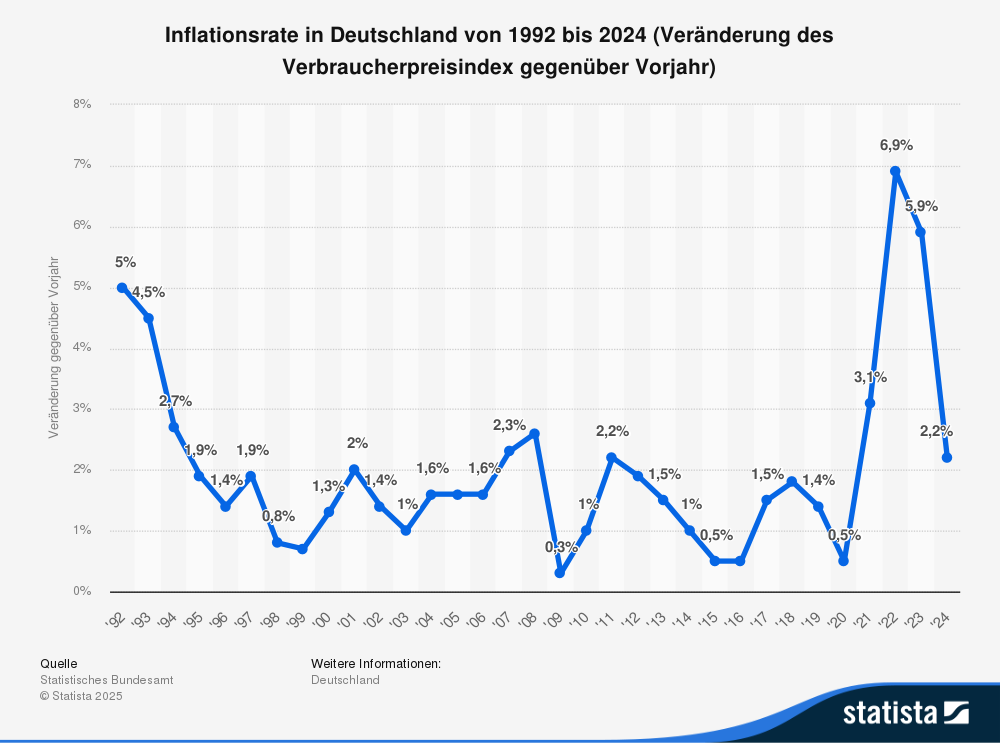

In [ ]:
display(Image(filename='assets/inflation.png'))

Dadurch, dass die Anzahl der Inserate keine Korrelation mit den Leitzinsen aufweisen tut, ist es nicht wunderlich, dass auch bei dem Kaufpreis keinerlei Korrelation besteht.

# Preisprognose
Nach der deskriptiven Analyse wird nun zu der induktiven Analyse übergegangen. Hierzu müssen vor der Umsetzung die Daten auf Redundanz geprüft werden und Prädiktoren für die Zielvariable ausgewählt werden.

Damit das Datum **adat** miteingebunden werden kann,

Erstellen einer neuen Spalte welche das Datum in eine 


<Axes: >

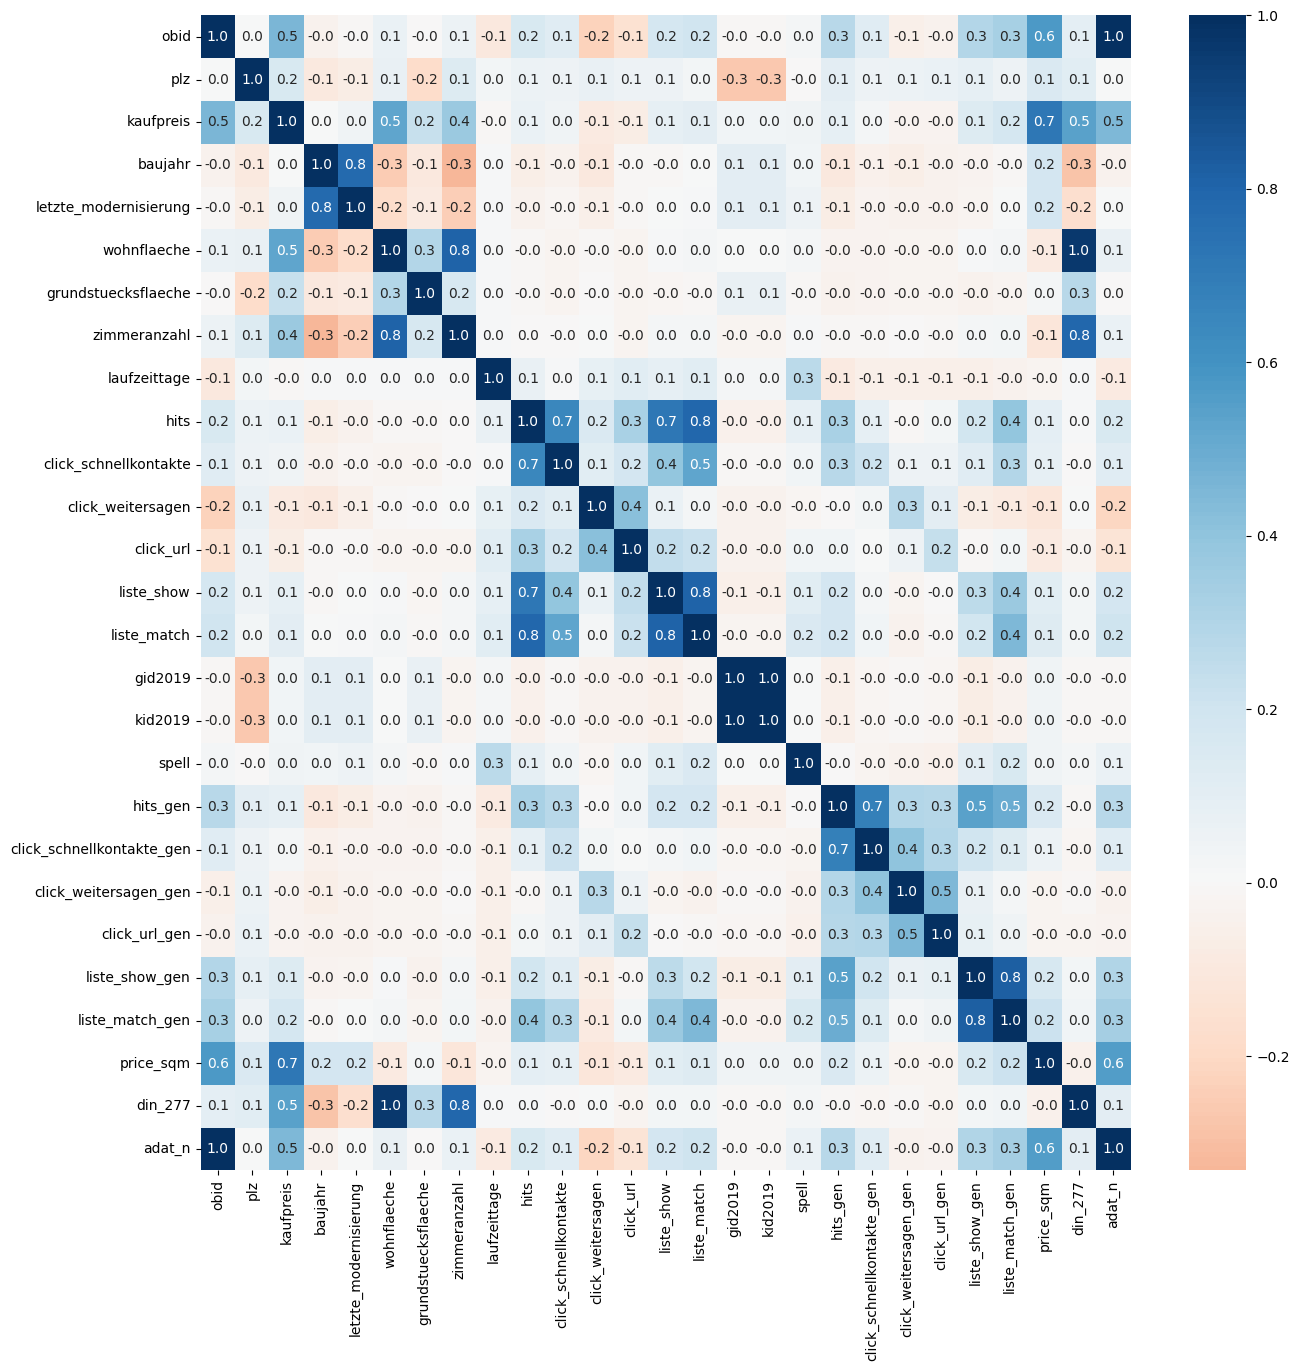

In [33]:
from datetime import datetime

t_df = c_df.copy()
print("Erstellen einer neuen Spalte welche das Datum in eine ")
start_date = datetime(2023, 1, 1)
t_df['adat_n'] = (t_df['adat'] - start_date).dt.days


fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(t_df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)


Mit blick auf die Korrelationsmatrix können folgende numerische Prädiktoren abgeleitet werden:
* obid
* plz
* wohnflaeche
* grundstuecksflaeche
* zimmeranzahl
* price_sqm
* din_277
* adat_n

Als Nächstes wird evaluiert, ob die Prädiktoren genutzt werden:
| Prädiktor  | Wird verwendet?  | Begründung  |
|-----------|-----------|-----------|
| obid  | Nein   | Im Sachbezug stellt es die ID des Inserates dar, die ID ist scheinbar aufsteigend, nimmt mit der Zeit zu, daher kann gesgat werden, dass der Zeitpunkt des Inserates eine wichtige Rolle spielen könnte, daher müsste **adat** und **edat** verwendet werden|
| plz   | Nein   | Es besteht zwar eine Korrelation, jedoch ist die PLZ nicht als Zahl sondern als Kategorie zu interpretieren, daher muss diee Variable anders betrachtet werden  |
| wohnfläche   | Ja   | Ein wichtiger Prädiktor   |
| grundstuecksflaeche | Ja | Gibt weitere Informationen über die Wohnfläche hinaus, korreliert nur geringfügig mit der Wohnfläche |
| zimmeranzahl | Nein | Korreliert zu stark mit der Wohnfläche, daher redundant |
| price_sqm | Ja | Höchste Korrelation mit dem Kaufpreis, der quadratmeterpreis könnte aus der Seite https://www.homeday.de/de/preisatlas entnommen werden|
|din_277 | Nein | korreliert zu stark mit der Wohnfläche, vermeidung der Redundanz |
| adat_n | Nein | korreliert stark mit dem Quadratmeter Preis |

Finale numerische Prädiktoren sind somit:
* wohnflaeche
* grundstuecksflaeche
* price_sqm



Als nächstes werden die Kategorischen Variablen genauer betrachtet.


## Multiple Lineare Regression
## KNN

In [ ]:
display(t_df.sort_values(by="adat"))

obid    plz  kaufpreis  baujahr  letzte_modernisierung  \
0        40500064  21037      447.0   1977.0                 1977.0   
215493   39834279  12623      105.0   1996.0                 1996.0   
215494   38485416  13591      240.0   1991.0                 1991.0   
215496   39596745  12209      540.0   1938.0                 1938.0   
215500   40386800  13465      150.0   1971.0                 1971.0   
...           ...    ...        ...      ...                    ...   
176555  147820909  65929      899.0   1894.0                 2000.0   
202182  147959977  81739     1070.0   2002.0                 2002.0   
202187  147958935  80935     1790.0   1960.0                 1960.0   
109271  147905161  47198      158.0   1905.0                 1905.0   
148636  147888751  50767      570.0   1981.0                 1981.0   

        wohnflaeche  grundstuecksflaeche  zimmeranzahl  laufzeittage  hits  \
0            190.00              2083.00           5.5             6    21   
215493        70.00               256.00           3.0             9    52   
215494       470.00              1601.00          12.0           143   530   
215496       198.00               623.00           7.0             3     8   
215500        81.00               247.00           3.5             4    62   
...             ...                  ...           ...           ...   ...   
176555       315.00               266.00          12.0            27  2070   
202182       140.28               250.28           6.0             1   411   
202187       220.00               920.00           9.0            18   378   
109271       209.00               186.00           6.0            21  1825   
148636       132.00               190.00           5.0            22  2506   

        ...  click_weitersagen_gen  click_url_gen  liste_show_gen  \
0       ...                    0.0       0.000000       84.333336   
215493  ...                    0.0       0.111111      115.222221   
215494  ...                    0.0       0.000000      100.356644   
215496  ...                    0.0       0.000000       53.666668   
215500  ...                    0.0       0.000000      123.500000   
...     ...                    ...            ...             ...   
176555  ...                    0.0       0.000000     1441.407349   
202182  ...                    0.0       0.000000     4846.000000   
202187  ...                    0.0       0.055556      822.666687   
109271  ...                    0.0       0.095238     1762.666626   
148636  ...                    0.0       0.000000     1475.045410   

        liste_match_gen       adat       edat    price_sqm  din_277  Jahr  \
0            479.166656 2007-01-01 2007-01-01  2352.631592  197.000  2007   
215493       247.333328 2007-01-01 2007-01-01  1500.000000   77.000  2007   
215494       227.888107 2007-01-01 2007-05-01   510.638306  477.000  2007   
215496       753.000000 2007-01-01 2007-01-01  2727.272705  205.000  2007   
215500       450.250000 2007-01-01 2007-01-01  1851.851807   88.000  2007   
...                 ...        ...        ...          ...      ...   ...   
176555      5518.888672 2023-12-01 2023-12-01  2853.968262  416.500  2023   
202182      6584.000000 2023-12-01 2023-12-01  7627.602051  189.364  2023   
202187      6609.611328 2023-12-01 2023-12-01  8136.363770  293.000  2023   
109271      6351.856934 2023-12-01 2023-12-01   755.980835  278.700  2023   
148636      6532.409180 2023-12-01 2023-12-01  4318.181641  178.600  2023   

              ort  
0         Hamburg  
215493     Berlin  
215494     Berlin  
215496     Berlin  
215500     Berlin  
...           ...  
176555  Frankfurt  
202182    München  
202187    München  
109271   Duisburg  
148636       Köln  

[295745 rows x 50 columns]